# EDA

# 0. Задача учебного проекта

Необходимо выяснить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого будет создана модель, предсказывающая результаты госэкзамена по математике для каждого ученика школы.

Здесь требуется:

- **провести разведывательный анализ данных**, чтобы определиться с параметрами будущей модели;
- **составить отчёт** по его результатам.


## Моя дополнительная задача:

На основе учебного проекта составить начальную версию руководства по разведывательному анализу данных (Exploratory Data Analysis manual), чтобы использовать в дальнейшем. Поэтому надо сделать EDA как можно более полно, пусть даже для этой конкретной задачи это и будет избыточно.

<div style="border:solid blue 2px; padding: 20px"> <h1 style="color:blue; margin-bottom:20px">EDA manual</h1>

## Основные цели EDA:

1. Проверить качество данных и очистить их, если это необходимо.
2. Изучить данные.
3. Сохранить максимально возможное количество записей
4. Сформулировать предположения и гипотезы для дальнейшего построения модели.
5. Определиться с параметрами модели.



## Основные шаги:

1. Загрузить данные
  - Проверить адекватны ли названия столбцов
2. Посмотреть на данные.
    - `info(memory_usage='deep')`
    - проверить тип данных (*float*, *int*, *object*, *datetime*,  *category*)
    - при необходимости изменить тип данных (в том числе и для экономного использования памяти)
    - определить целевой признак
3. Проверить данные на 
  - дублированные/полностью скоррелированные значения (`.duplicated()`)
  - на пустые значения
    - target - first !
4. Изучить распределения признаков.
  1. Определить типы признаков:
    - численные (`numerical`)
    - категориальные (`categorical`) среди которых
      - упорядоченные (`ordinal`)
      - неупорядоченные (`one-hot`), в т.ч. бинарные (`binary`)
  2. Numerical: 
    - `sns.boxplot()`: anomaly detection
    -  `sns.distplot()`: distribution
    - `sns.scatterplot()` for `feature`/`target`: dependency
    - basic statistics `.describe()` (mean, std, min, max, quantiles)
    - number of missing values
    - Pearson coefficient of linear correlation for `feature`/`target`
  3. Categorical:
    - `...`
5. Проверить данные на наличие выбросов/аномалий.
6. При необходимости 
  - заполнить/отбросить пропуски
  - исключить аномалии
7. Отобрать данные, пригодные для дальнейшего построения модели.

Снова и снова возвращаться к предыдущим пунктам, пока не будет достигнут нужный результат, даже из стадии построения модели.
    
    

## NB
    
- Maintain list of DataFrames with their descriptions

### Предоставленное описание

1. `school` — аббревиатура школы, в которой учится ученик

2. `sex` — пол ученика ('F' - женский, 'M' - мужской)

3. `age` — возраст ученика (от 15 до 22)

4. `address` — тип адреса ученика ('U' - городской, 'R' - за городом)

5. `famsize` — размер семьи('LE3' <= 3, 'GT3' >3)

6. `Pstatus` — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. `Medu` — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. `Fedu` — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. `Mjob` — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. `Fjob` — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. `reason` — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. `guardian` — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. `traveltime` — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. `studytime` — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. `failures` — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

16. `schoolsup` — дополнительная образовательная поддержка (yes или no)

17. `famsup` — семейная образовательная поддержка (yes или no)

18. `paid` — дополнительные платные занятия по математике (yes или no)

19. `activities` — дополнительные внеучебные занятия (yes или no)

20. `nursery` — посещал детский сад (yes или no)

21. `studytime, granular` - **Столбец, не предоставленный в описании**

22. `higher` — хочет получить высшее образование (yes или no)

23. `internet` — наличие интернета дома (yes или no)

24. `romantic` — в романтических отношениях (yes или no)

25. `famrel` — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

26. `freetime` — свободное время после школы (от 1 - очень мало до 5 - очень мого)

27. `goout` — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

28. `health` — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

29. `absences` — количество пропущенных занятий

30. `score` — баллы по госэкзамену по математике

**Целевым признаком** является `score` и он - численный.

# 1. Загрузка библиотек и данных

In [1]:
# import

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

In [2]:
### Global constants and settings


# Plotting

sns.set(style='darkgrid', palette="bright")
sns.set(font_scale = 1.25)

FONT_SIZE = 14

In [3]:
filepath = 'D:\\Data_Science_0\\Data_Science_=_Skill_Factory\\Real_DS_=_2_EDA\\'
stud_math = pd.read_csv(filepath + 'stud_math.csv')
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


# 2. Общая информация

In [4]:
stud_math.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Посмотрим на признак, отсутствующий в описании:

In [5]:
stud_math['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

В таблице 395 записей (это мало, надо быть бережнее к ним), с 30 признаками. Многие признаки содержат пропуски.

Есть столбец `studytime, granular`, отсутствующий в описании. Этот столбец содержит числовые данные, которые принимают 4 значения: [-12, -9, -6, -3].

## 2.1 Наличие дубликатов и пропусков

Проверим есть ли дубликаты:

In [6]:
print("There are {} duplicates.".format( stud_math.duplicated().sum() ))

There are 0 duplicates.


Дубликатов нет.

Теперь проверим (отдельно ото всех прочих и в первую очередь) наличие пропусков в целевом признаке (`score`). Здесь нам нужна достоверная информация, поэтому стратегия будет одна - найти пропуски и удалить.

In [7]:
print("The target has {} missing values.".format( stud_math['score'].isna().sum() ))

The target has 6 missing values.


In [8]:
stud_math.dropna(subset=['score'], inplace=True)
print("Now we have {} enries.".format( len(stud_math) ))

Now we have 389 enries.


Теперь проверим все остальные признаки на наличие пропусков.

In [9]:
stud_math.isna().sum()

school                  0
sex                     0
age                     0
address                15
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 38
paid                   39
activities             14
nursery                15
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime                9
goout                   7
health                 15
absences               11
score                   0
dtype: int64

In [10]:
print("Maximal amount of missing values ({} - {:.1%}) is in the '{}'.".format( stud_math.isna().sum().max(), 
                                                                           stud_math.isna().sum().max()/len(stud_math),
                                                                           stud_math.isna().sum().idxmax() ))

Maximal amount of missing values (45 - 11.6%) is in the 'Pstatus'.


Максимальная доля пропусков 11.6% - довольно много для нашего небольшого датасета. Для того, чтобы понять что делать с пропусками (заполнять/выкидывать записи или вовсе избавится от признака) стоит:
- Bзучить корреляцию признака с целевым признаком. Возможно, некоторые признаки не влияют на целевой признак и их можно отбросить.;
- Изучить распределение признака. Это может помочь сообразить как заполнять пропуски.
- Изучить (по возможности$^1$) мультиколлинеарность с другими признаками.

$^1$: Стоит помнить, что для полного изучения мультиколлинеарноности потребуется изучить $N_f(N_f-1)/2$ пар `feature[i]`/`feature[j]`. В нашем случае это 435 пар.

In [11]:
N_f = stud_math.columns
print("There are {} possible pairs of features.".format( int(len(N_f)*(len(N_f)-1)/2) ))

There are 435 possible pairs of features.


# 3. Исследование признаков

Определим какие признаки являются:
- численными (numerical)
- категориальными (categorical) среди которых есть
  - упорядоченные (ordinal)
  - бинарные (binary)
  - прочие неупорядоченные

In [12]:
features_set = set(stud_math.columns[:-1])

features_numerical = ['age', 'absences']
features_numerical_set = set(features_numerical)

features_categorical_set = features_set - features_numerical_set
features_categorical = list(features_categorical_set)

features_ordinal = ['Medu', 'Fedu', 'traveltime', 'studytime', 'studytime, granular',
                    'famrel', 'freetime', 'goout', 'health']
features_ordinal_set = set(features_ordinal)

features_one_hot_set = features_categorical_set - features_ordinal_set
features_one_hot = list(features_one_hot_set)


print("There are {} numerical variables.".format( len(features_numerical) ))
print("There are {} categorical variables, among them:\n    {} ordianal variables and\n    {} 'one-hot' variables".
      format( len(features_categorical_set), len(features_ordinal), len(features_one_hot) ))

There are 2 numerical variables.
There are 27 categorical variables, among them:
    9 ordianal variables and
    18 'one-hot' variables


Из 29 признаков числовых только 2: [age, absences], остальные 27 - категориальные.

Из 27 категориальных:
- 9 - ordinal, соответственно, их будем кодировать при помощи `OrdinalEncoder` из `sklearn.preprocessing`;
- 18 - 'one-hot' (12 - binary), соответственно, их будем кодировать при помощи функции `get_dummies` из `pandas`. Её преимущество над `OrdinalEncoder` из `sklearn.preprocessing` - используя параметр `drop_first` можно сразу выключить одно значение для избежания dummy-ловушки.

Признак `failures` определён как количество внеучебных неудач (n, если 1<=n<3, иначе 0). Если неудач было 0, или больше 3, признак в обоих случая будет 0. Это не `ordinal`, a `one-hot`. Причём подозрительный - нет неудач и много неудач кодируются одиноково - стоит присмотреться не кандидат ли этот признак на вылет.

**Замену типа переменных** сделаем после того, как в данных не станет пропусков - `astype()` их не любит.

### 3.0.0 Function for analysis of numerical variables

Для анализа численных (numerical) данных удобно написать одну функцию, которая
- рисует `sns.boxplot()`: удобно выявлять аномалии
- рисует распределение `sns.distplot()`
- рисует диаграмму рассеяния `sns.scatterplot()` для пары `feature`/`target`: можно выявить зависимости
- вычисляет базовые статистические показатели `.describe()` (среднее, дисперсия, минимальное и максимально значения, квантили)
- сообщает сколько пропущенных значений (missing values)
- вычисляет линейный коэффициент корреляции Пирсона для пары `feature`/`target`

In [13]:
def num_variable_analysis(df, item, target_name, n_bins=100):
    if item != target_name:
        fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    
    
    # ==== FIG 1 (boxplot)    
    df.boxplot(column=item, ax=axes[0])
    axes[0].set_title(item, fontsize=FONT_SIZE)

    
    # ==== FIG 2 (distplot)
    sns.distplot(df[item], bins=n_bins, kde=True, ax=axes[1], vertical=True)
    axes[1].set_title(item, fontsize=FONT_SIZE)
    # axes.set_xlim((0, 100))
    
    
    # === FIG 3 (scatterplot)
    if item != target_name:
        axes[2] = sns.scatterplot(x=item, y=target_name, data=df)
    
    
    # === Descriptive statistics
    describer = pd.DataFrame(df[item].describe()).T    
    print("==== {} ====\n".format(item))
    print(describer, "\n")
    
    
    # Pearson correlation coefficient for feature/target
    if item != target_name:
        corr_coeff = np.array(df[[item, target_name]].corr())[0, 1]
        print("Pearson correlation coefficient of '{}' and '{}' is {:.4f}.".format( item, target_name, corr_coeff ), "\n")
    
    
    # === Missing values
    print("There are {} missing values in '{}'.".format( df[item].isna().sum(), item ), "\n"*2)

<font color=blue> Я хотел рисовать не `sns.scatterlot()`, а `sns.relpot()` с кругами, размер которых пропорционален числу записей целевого признака (напр. age=17, score=60 : count=10, а для age=17, score=60 : count=7), но "не дожал" разобраться как передать эту информацию в `relplot`. Может у Вас есть ответ?

In [14]:
item = 'age'
target_name = 'score'
stud_math[ (stud_math['age'] == 15) & (stud_math[target_name] == 60)][target_name].count()
stud_math.groupby([item, target_name])[target_name].count()

age  score
15   0.0      6
     25.0     1
     30.0     4
     35.0     2
     40.0     5
             ..
20   45.0     1
     75.0     1
     90.0     1
21   35.0     1
22   40.0     1
Name: score, Length: 76, dtype: int64

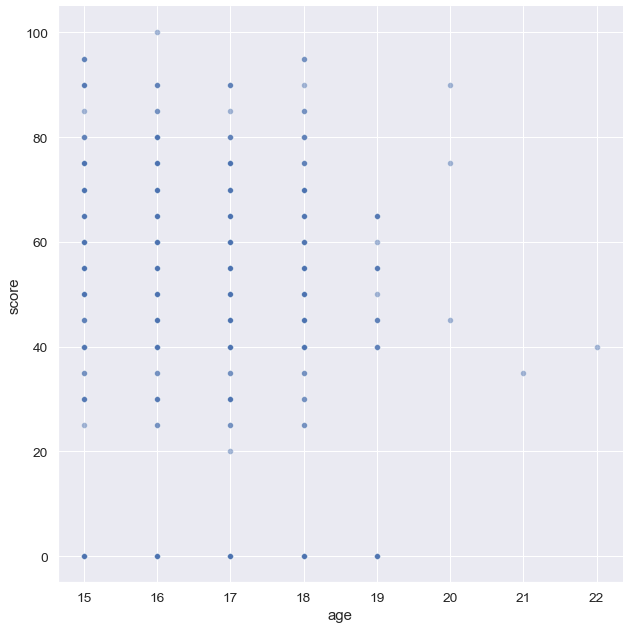

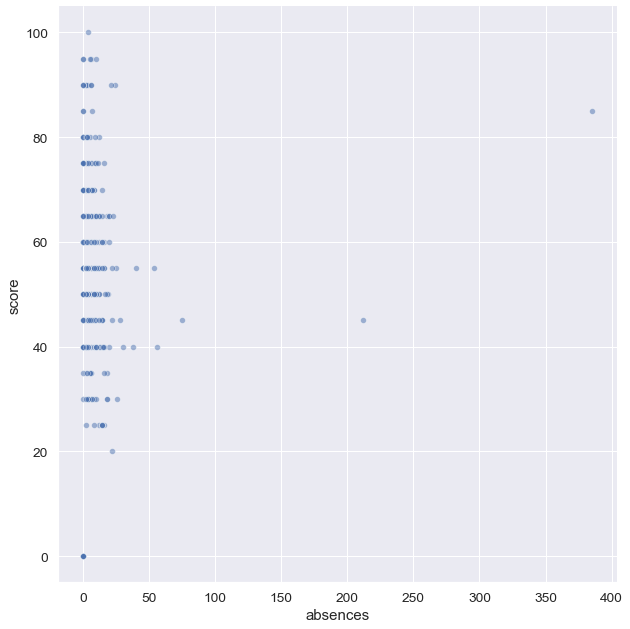

In [15]:
for item in features_numerical:
#     size_count = stud_math_present.groupby([item, target_name])[target_name].count()
    sns.relplot(x=item, y=target_name, data=stud_math, #size=size_count,
                alpha=.5, height=9, aspect=1, palette="muted")

## 3.0 Целевой признак ('score')

==== score ====

       count       mean        std  min   25%   50%   75%    max
score  389.0  52.262211  22.919022  0.0  40.0  55.0  70.0  100.0 

There are 0 missing values in 'score'. 




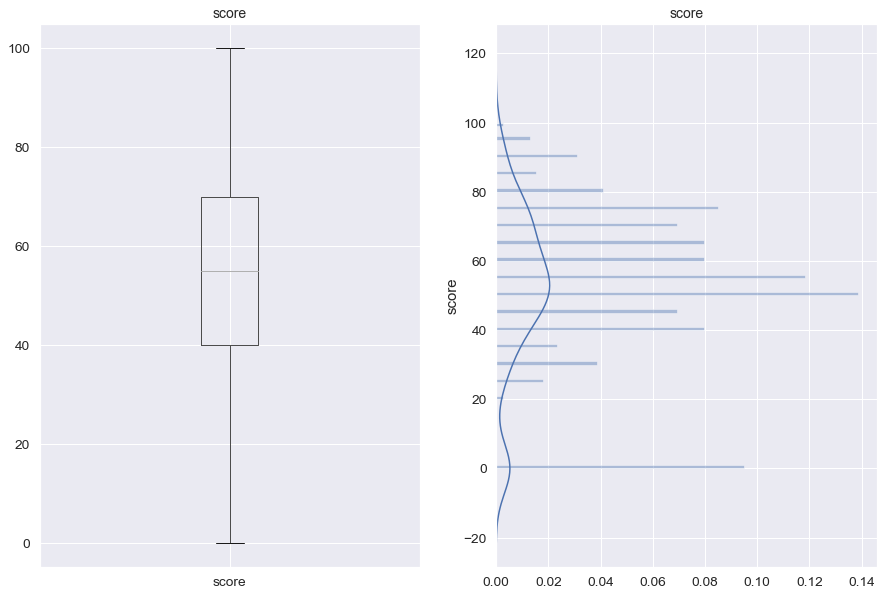

In [16]:
target_name = 'score'
num_variable_analysis(stud_math, target_name, target_name)

Похоже, что значения целевого признака квантованны с шагом `5`. Проверим:

In [17]:
target_value_counts = pd.DataFrame(stud_math[target_name].value_counts()).reset_index()
target_value_counts.columns = ['score', 'counts']
target_value_counts.sort_values('score')

,score,counts
2,0.0,37
17,20.0,1
13,25.0,7
10,30.0,15
12,35.0,9
5,40.0,31
8,45.0,27
0,50.0,54
1,55.0,46
6,60.0,31


Наблюдается явный аномальный выброс на значении `0`. Все остальные оценки лежат в диапазоне [20, 100] с шагом 5.

По-видимому, оценка `0` соответствует тому, что учащийся не пришёл на экзамен. Поскольку нам надо предсказать оценку пришедших на экзамен, удалим записи с оценкой `0`. 

У нас останется 352 записей.

**Note:** Предсказание "придёт/не придёт человек на экзамен" это задача классификации, а не регрессии и требует несколько иного подхода и иной модели.

**Важно!** Оценки кратны `5`, это необходимо учесть при прогнозировании и валидации.

stud_math_present: (352, 30)
stud_math_absent: (37, 30)
==== score ====

       count       mean        std   min   25%   50%   75%    max
score  352.0  57.755682  16.200928  20.0  45.0  55.0  70.0  100.0 

There are 0 missing values in 'score'. 




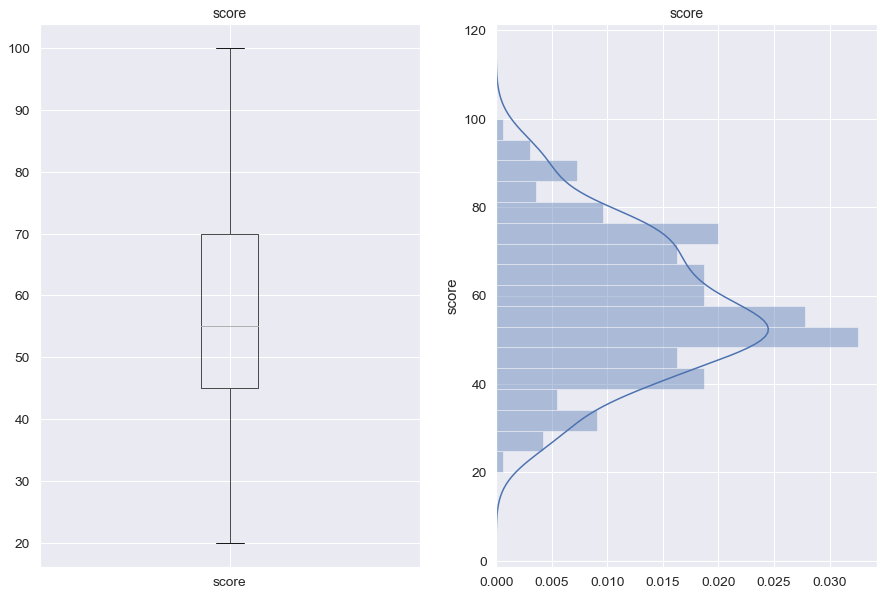

In [18]:
stud_math_present = stud_math[ stud_math[target_name] != 0 ]#.reset_index()
stud_math_absent = stud_math[ stud_math[target_name] == 0 ]#.reset_index()

print('stud_math_present:', stud_math_present.shape)
print('stud_math_absent:', stud_math_absent.shape)

num_variable_analysis(stud_math_present, target_name, target_name, n_bins=17)

## 3.1 Численные признаки

==== age ====

     count       mean       std   min   25%   50%   75%   max
age  352.0  16.633523  1.256011  15.0  16.0  17.0  18.0  22.0 

Pearson correlation coefficient of 'age' and 'score' is -0.1315. 

There are 0 missing values in 'age'. 


==== absences ====

          count      mean      std  min  25%  50%  75%    max
absences  342.0  8.090643  24.7046  0.0  2.0  4.0  8.0  385.0 

Pearson correlation coefficient of 'absences' and 'score' is -0.0140. 

There are 10 missing values in 'absences'. 




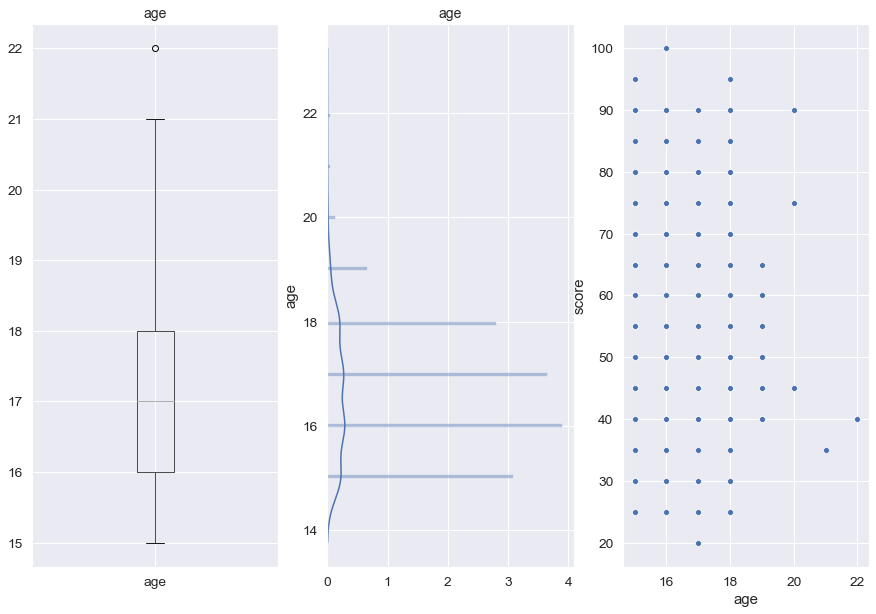

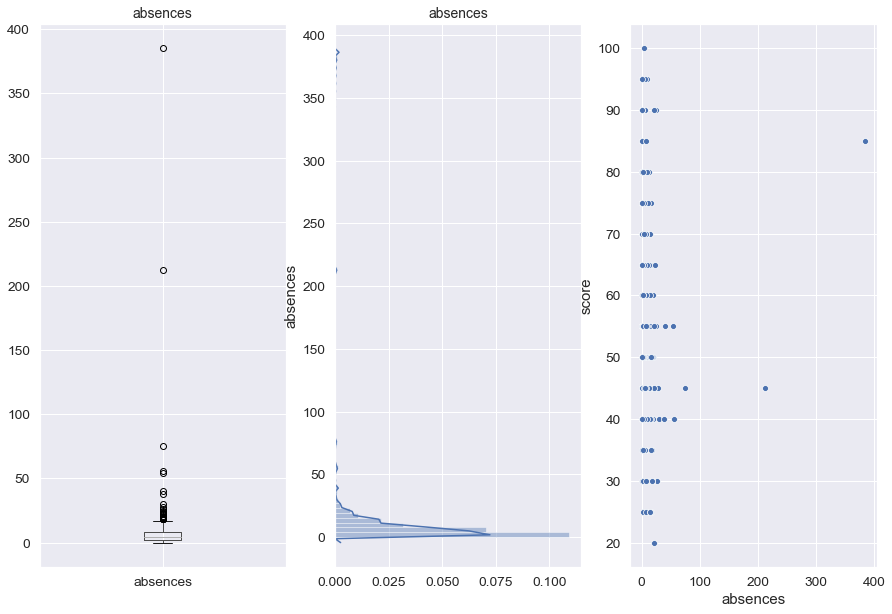

In [19]:
for item in features_numerical:
    num_variable_analysis(stud_math_present, item, target_name)

Признак 'age' (возраст ученика (от 15 до 22)) аномалий не содержит. Коэффициент корреляции довольно мал и отрицательный (-0.13), что по-видимому, описывает связь величин в виде: "старше становишься, тяжелее сдавать". Заметим, что последний эффект хоть и присутствует, но не жёстко детерминирован, поэтому и коэффициент корреляции хоть и отличен от нуля, но далёк по модулю от 1.

Оставим признак для модели, поскольку он описывает реальное явление.

In [20]:
stud_math_present[ stud_math_present['absences'] > 100 ]['absences']

222    385.0
390    212.0
Name: absences, dtype: float64

In [21]:
stud_math_present.loc[[202, 347]]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
202,GP,F,17,U,NaN,T,1.0,1.0,other,other,...,-6.0,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
347,GP,M,18,U,GT3,T,4.0,3.0,teacher,other,...,-9.0,NaN,yes,yes,NaN,4.0,5.0,5.0,0.0,45.0


Ка видно из *boxplot* и *scatterplot* признак 'absences' (количество пропущенных занятий) содержит 2 аномальных значения (212 и 385).
Эти аномалии соответстсвуют:
- девице 16 лет с колоссальным количеством пропусков 385, которая однако или суперумная, или удачно списала, поскольку получила весьма ввысокий балл - 85;
- парню 20 лет из неполной семьи, у которого огромное количество свободного времени, девушка, но всё же смог сдать математику на удовлетворительные 45 баллов.

С этими двумя аномалиями коэффициент корреляции признака с целевым близок к нулю (-0.01). Посмотрим, что будет без них.

==== absences ====

          count      mean       std  min  25%  50%  75%   max
absences  340.0  6.382353  8.323527  0.0  2.0  4.0  8.0  75.0 

Pearson correlation coefficient of 'absences' and 'score' is -0.2149. 

There are 0 missing values in 'absences'. 




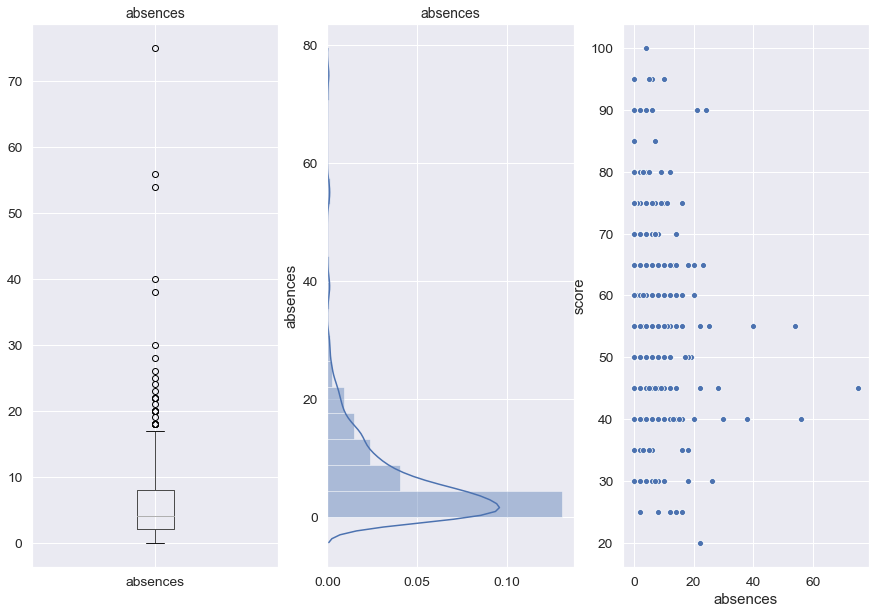

In [22]:
num_variable_analysis(stud_math_present[ stud_math_present['absences'] <= 100 ], 'absences', target_name, n_bins=17)

Без этих аномалий распределение выглядит вполне адекватно и коэффициент корреляции с целевым признаком равен -0.21, что отражает явление "больше пропускаешь - хуже сдаёшь". 

Выкинем аномалиии, признак оставим.

In [23]:
# Since the feature 'absences' has 10 missing values
# do not drop anomalies with
# 
# stud_math_present = stud_math_present[ stud_math_present['absences'] <= 100 ]
#
# since you drop missimg values also.


indices_to_drop = stud_math_present[ stud_math_present['absences'] > 100 ]['absences'].index
stud_math_present = stud_math_present.drop(index=indices_to_drop)#.reset_index()

print("There are {} entities are left in dataset.".format( len(stud_math_present) ))
stud_math_present

There are 350 entities are left in dataset.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## 3.2 Категориальные признаки

Оценим количество уникальных значений для номинативных переменных.

In [24]:
categorical_unique_dict = dict()
for item in features_categorical:
    categorical_unique_dict[item] = stud_math_present[item].nunique()

categorical_unique = pd.Series(categorical_unique_dict, index=categorical_unique_dict.keys()).sort_values(ascending=False)
categorical_unique

Fedu                   6
famrel                 6
Medu                   5
Fjob                   5
freetime               5
goout                  5
health                 5
Mjob                   5
traveltime             4
studytime              4
studytime, granular    4
failures               4
reason                 4
guardian               3
school                 2
schoolsup              2
internet               2
nursery                2
activities             2
higher                 2
paid                   2
sex                    2
famsize                2
romantic               2
address                2
famsup                 2
Pstatus                2
dtype: int64

In [25]:
print("We have {} binary variables.".format(categorical_unique[ categorical_unique == 2 ].count()))
print("While there are {} variables: {}, which have maximal number of unique values ({})."
      .format(categorical_unique[ categorical_unique == categorical_unique.max() ].count(), 
              list(categorical_unique[ categorical_unique == categorical_unique.max() ].index),
              categorical_unique.max()))

We have 13 binary variables.
While there are 2 variables: ['Fedu', 'famrel'], which have maximal number of unique values (6).


Количество уникальных значений у категориальных признаков лежит в диапазоне от 2 до 6 (у 'Fedu' и 'famrel'). Бинарных признаков - 13.

### 3.2.1 Ordinal features

#### 3.2.1.0 Function for analysis of ordinal variables

Для анализа упорядоченных категориальных (ordinal) данных удобно написать одну функцию, которая
- рисует `sns.barplot()`: фактически распределение, удобно выявлять дисбаланс классов
- рисует `sns.boxplot()` для каждого класса: удобно выявлять аномалии внутри классов
- рисует распределения `sns.kdeplot()` для каждого класса: удобно сравнивать классы (`sns.distplot()` оказался неинформативным)
- вычисляет линейный коэффициент корреляции Пирсона для пары `feature`/`target`
- выводит количество значений целевого признака для каждого класса: удобно выявлять аномалии, даёт общее представлении о частности каждого класса
- сообщает сколько пропущенных значений (missing values)

In [26]:
def ordinal_variable_analysis(df, item, target_name):
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    
    # ==== FIG 1 (barplot)
    bar_data = df.groupby(item)[item].count()
    sns.barplot(x=bar_data.index, y=bar_data, ax = axes[0], palette="Blues_d")
    axes[0].set_title(item, fontsize=FONT_SIZE)
    
    
    # ==== FIG 2 (boxplots for classes)
    sns.boxplot(x=item, y=target_name, data=df, ax=axes[1])
    axes[1].set_title(item, fontsize=FONT_SIZE)

        
    # ==== FIG 3 (kdeplots for classes)
    values = df[item].value_counts()
    
    for value in values.index:
        sns.kdeplot(df[ df[item] == value ][target_name], vertical=True, ax=axes[2], label=value)    
    axes[2].set_title(item, fontsize=FONT_SIZE)
    axes[2].legend(fontsize=FONT_SIZE)
    
    
    # === Descriptive statistics
    
    print("==== {} ====\n".format(item))
    if item != target_name:
        print("Pearson correlation coefficient of '{}' and '{}' is {:.4f}."
              .format( item, 
                      target_name, 
                      np.array(stud_math_present[[item, target_name]].corr())[0, 1] ), "\n")
    
    print(bar_data, "\n")
    
    print("There are {} missing values in '{}'.".format( df[item].isna().sum(), item ), '\n'*2)

==== Medu ====

Pearson correlation coefficient of 'Medu' and 'score' is 0.1896. 

Medu
0.0      3
1.0     47
2.0     86
3.0     87
4.0    125
Name: Medu, dtype: int64 

There are 2 missing values in 'Medu'. 




C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


==== Fedu ====

Pearson correlation coefficient of 'Fedu' and 'score' is 0.0688. 

Fedu
0.0      2
1.0     65
2.0     93
3.0     88
4.0     80
40.0     1
Name: Fedu, dtype: int64 

There are 21 missing values in 'Fedu'. 


==== traveltime ====

Pearson correlation coefficient of 'traveltime' and 'score' is -0.0743. 

traveltime
1.0    217
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64 

There are 23 missing values in 'traveltime'. 


==== studytime ====

Pearson correlation coefficient of 'studytime' and 'score' is 0.1429. 

studytime
1.0     90
2.0    171
3.0     58
4.0     24
Name: studytime, dtype: int64 

There are 7 missing values in 'studytime'. 


==== studytime, granular ====

Pearson correlation coefficient of 'studytime, granular' and 'score' is -0.1429. 

studytime, granular
-12.0     24
-9.0      58
-6.0     171
-3.0      90
Name: studytime, granular, dtype: int64 

There are 7 missing values in 'studytime, granular'. 




C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


==== famrel ====

Pearson correlation coefficient of 'famrel' and 'score' is 0.0612. 

famrel
-1.0      1
 1.0      6
 2.0     13
 3.0     56
 4.0    163
 5.0     87
Name: famrel, dtype: int64 

There are 24 missing values in 'famrel'. 


==== freetime ====

Pearson correlation coefficient of 'freetime' and 'score' is -0.0074. 

freetime
1.0     16
2.0     59
3.0    131
4.0    102
5.0     34
Name: freetime, dtype: int64 

There are 8 missing values in 'freetime'. 


==== goout ====

Pearson correlation coefficient of 'goout' and 'score' is -0.1730. 

goout
1.0     18
2.0     92
3.0    118
4.0     73
5.0     43
Name: goout, dtype: int64 

There are 6 missing values in 'goout'. 


==== health ====

Pearson correlation coefficient of 'health' and 'score' is -0.0731. 

health
1.0     45
2.0     36
3.0     80
4.0     52
5.0    124
Name: health, dtype: int64 

There are 13 missing values in 'health'. 




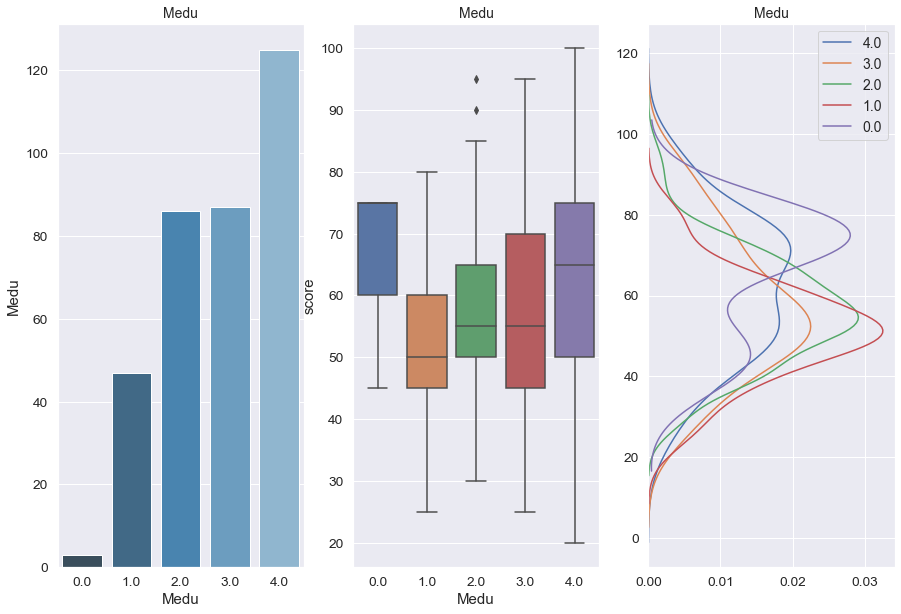

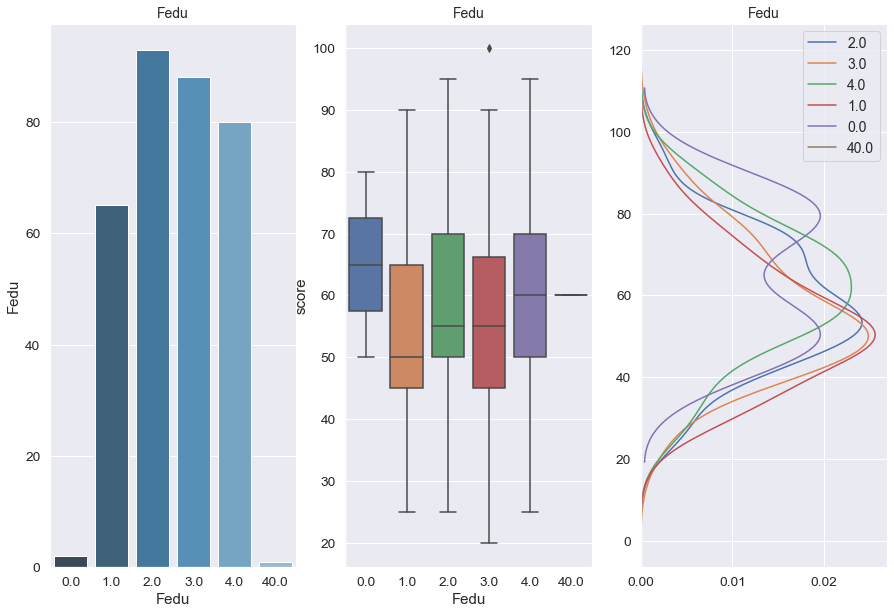

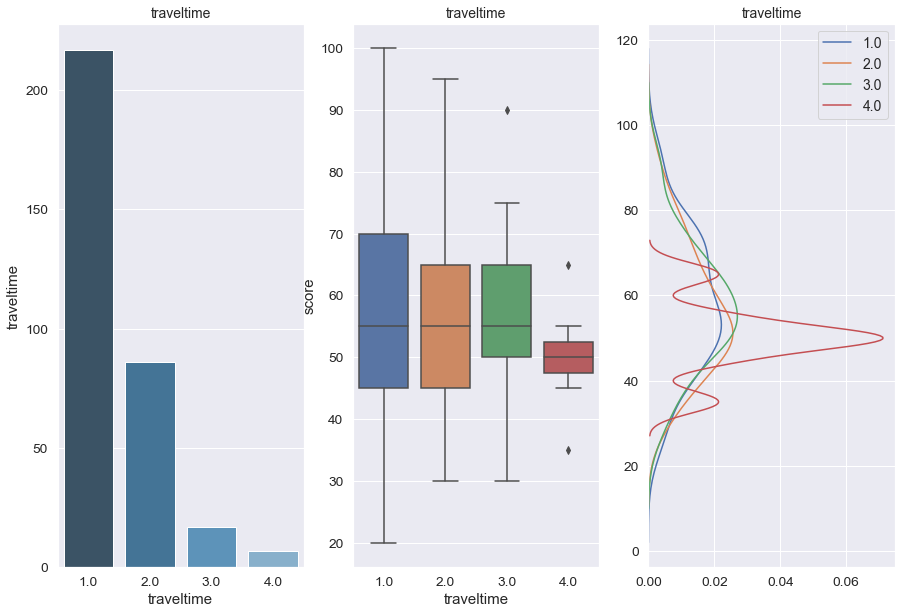

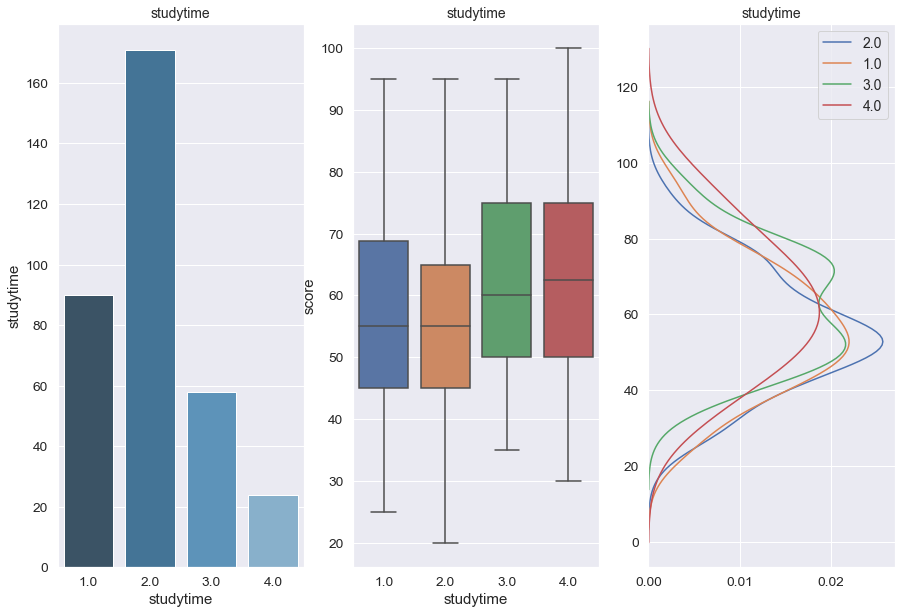

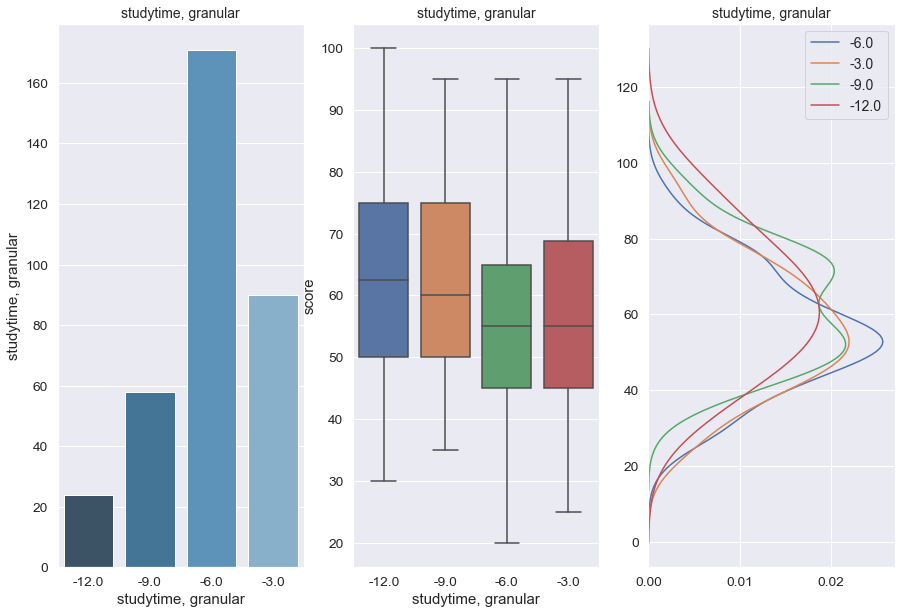

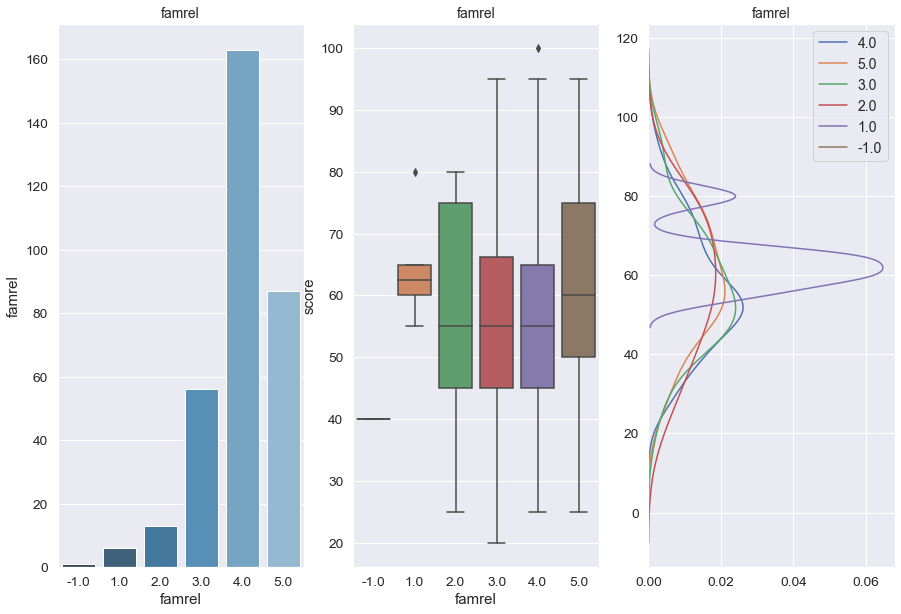

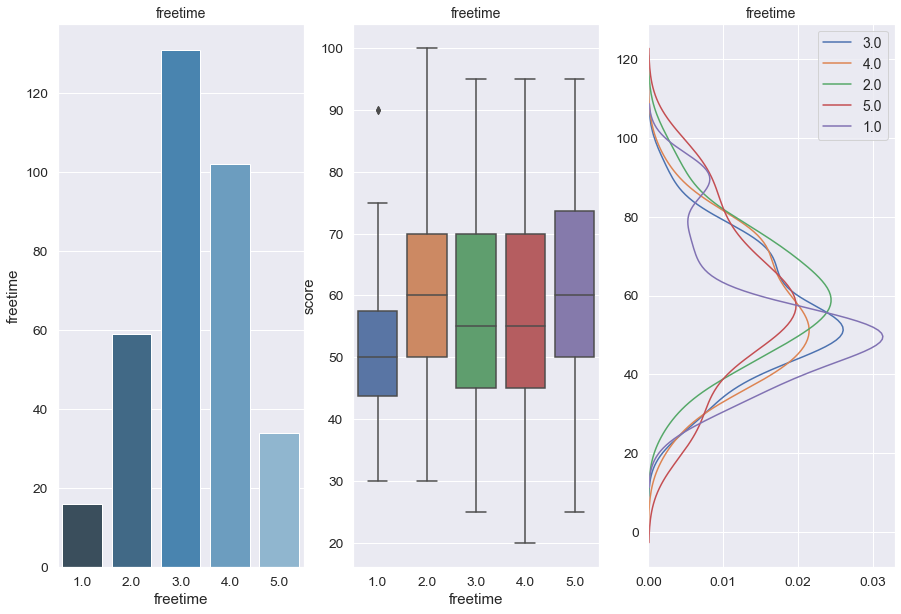

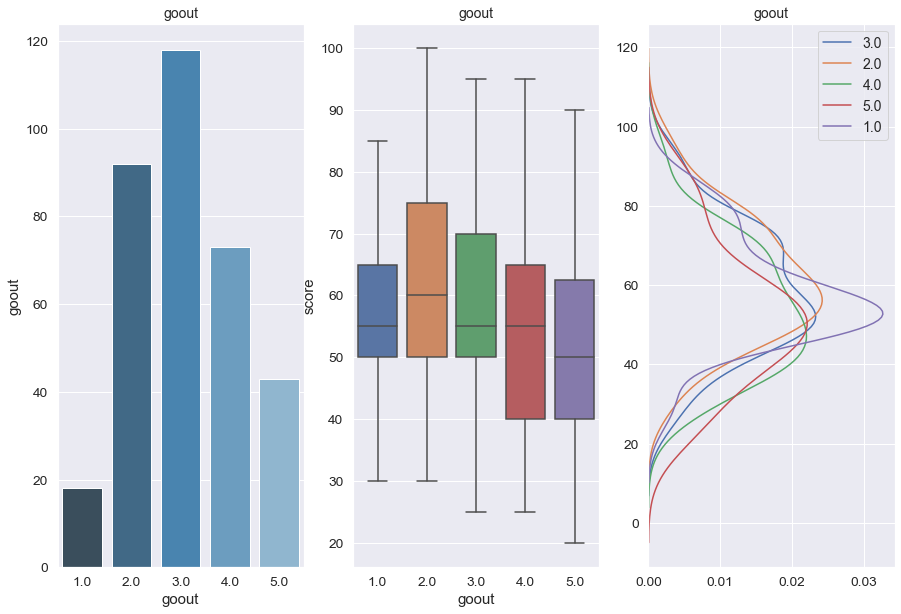

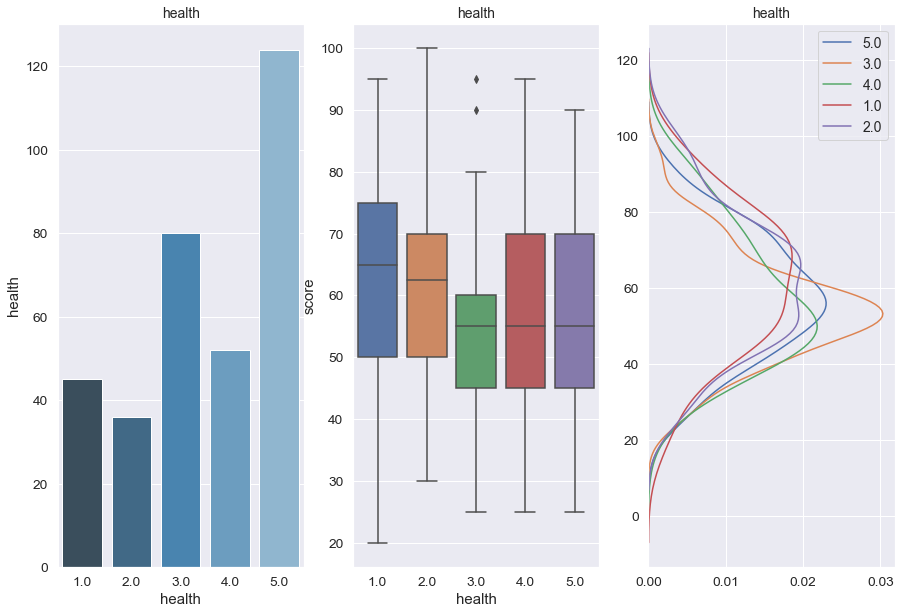

In [27]:
for item in features_ordinal:
    ordinal_variable_analysis(stud_math_present, item, target_name)

**Обнаружены аномалии:**

1. **Fedu** - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 — высшее). 
Есть выброс с абсурдным значением `40`. Вероятнее всего, это опечатка. Заменим на `4`.

2. **famrel** - семейные отношения (от 1 - очень плохо до 5 - очень хорошо). Есть запись с абсурдным значением `-1`. Вероятно, это - опечатка. Заменим на `1`.

In [28]:
index_subst = stud_math_present[ stud_math_present['Fedu'] == 40 ].index
stud_math_present.loc[index_subst, 'Fedu'] = 4

==== Fedu ====

Pearson correlation coefficient of 'Fedu' and 'score' is 0.1327. 

Fedu
0.0     2
1.0    65
2.0    93
3.0    88
4.0    81
Name: Fedu, dtype: int64 

There are 21 missing values in 'Fedu'. 




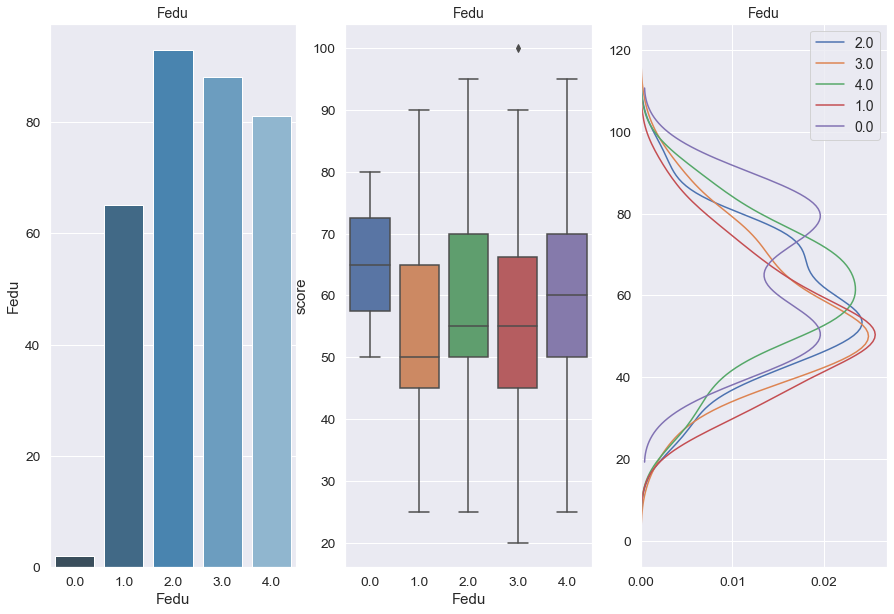

In [29]:
ordinal_variable_analysis(stud_math_present, 'Fedu', target_name)

In [30]:
index_subst = stud_math_present[ stud_math_present['famrel'] == -1 ].index
stud_math_present.loc[index_subst, 'famrel'] = 1

==== famrel ====

Pearson correlation coefficient of 'famrel' and 'score' is 0.0555. 

famrel
1.0      7
2.0     13
3.0     56
4.0    163
5.0     87
Name: famrel, dtype: int64 

There are 24 missing values in 'famrel'. 




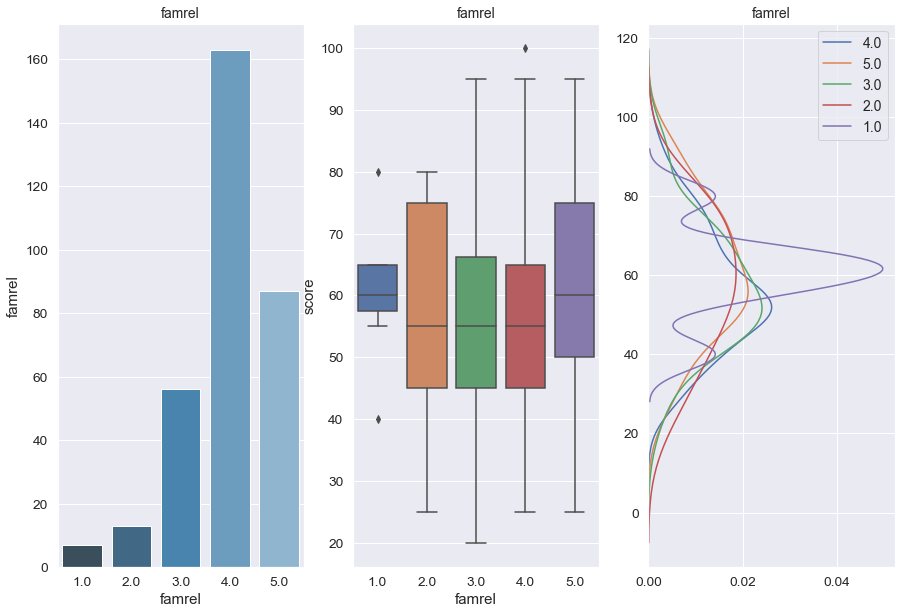

In [31]:
ordinal_variable_analysis(stud_math_present, 'famrel', target_name)

| Признак | Описание признака | Аномалии | Пропущенные значения | Коэффициент корреляции с целевым признаком | Описание корреляции | Действие | 
| :-- | :-- | :-- | --: | --: | :-- | -:- | 
| **Medu** | образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 — высшее) | нет | 2 | 0.19 | Чем выше уровень образования матери, тем лучше сдаёт экзамен по математике ребёнок. | Accepted | 
| **Fedu** | образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 — высшее) | Был обнаружен выброс с абсурдным значением `40`. Заменён на `4`. | 21 | 0.13 | Чем выше уровень образования отца, тем лучше сдаёт экзамен по математике ребёнок. | Accepted |
| **traveltime** | время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) | нет | 23 | -0.07 | Чем дольше учащийся добирается до школы, тем хуже сдаёт экзамен по математике ребёнок. | **Возможна мультиколлинеарность** с `address` |
| **studytime** | время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) | нет | 7 | 0.14 | Чем больше учишься, тем лучше сдаёшь, кэп | Accepted |
| **Studytime, granular** | Столбец, не предоставленный в описании. Непонятно что. | нет | 7 | -0.14 | Чем больше ..., тем хуже сдаётся экзамен | **Нет ли корреляции** с studytime? |
| **famrel** | семейные отношения (от 1 - очень плохо до 5 - очень хорошо) | Была обнаружена запись с абсурдным значением `-1`. Значение заменено на `1` | 24 | 0.055 | Чем лучше семейные отношения, тем лучше сдаётся экзамен | *Хотя  коэффициент корреляции и мал*... Accepted |
| **freetime** | свободное время после школы (от 1 - очень мало до 5 - очень мого) | нет | 8 | 0.007 | Может и не влияет на результат экзамена, но на вид распределения для различных классов разные | Accepted |
| **goout** | проведение времени с друзьями (от 1 - очень мало до 5 - очень много) | нет | 6 | -0.17 | Больше времени тусишь с друзьями — хуже сдаёшь. | Accepted |
| **health** | текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) | нет | 13 | -0.07 | Лучше здоровье — хуже сдаёшь. | **Suspected** Коллинеарность с другими признаками? |

In [32]:
# stud_math_present.drop(['freetime'], axis=1, inplace=True)
# features_ordinal_set = features_ordinal_set - set(['freetime'])
# features_ordinal = list(features_ordinal_set)
# stud_math_present.shape

### 3.2.2 One-Hot features

Вопрос о корреляции бинарных переменных с целевым признаком, вообще говоря, не так уж и прост. Коэффициент корреляции Пирсона здесь не применим. Сформулируем задачу следующим образом:
- Есть ли статитстически значимая разница между распределением признаков для двух различных значений бинарной переменной. 

Тут могут помочь
- статистические тесты на равенство дисперсий, средних значений и т.п.
- или же простое сравнение двух распределений. 

С последнего варианта и начнём. Основная причина: чтобы корректно провести тесты, нужно рассмотреть разные варинаты (см. ниже), сейчас может не хватит времени для аккуратной реализации, а результат нужен вовремя.

Будем считать распределения одинаковы если:
- средние отличаются менее, чем на половину кванта целелевого признака (`score`), т.е. менее чем на 2.5
- дисперсии отличаются менее, чем на квант целелевого признака (`score`), т.е. менее чем на 5.0.

Важно также проверить вопрос о сбалансированности двух классов. Будем считать классы несбалансированные если:
- расположив классы по убыванию частности
- отношение частности двух соседних классов больше `3`.

Число `3` во многом волюнтаристское, хотя можно привести в его защиту следующие аргументы:
- для экспоненциальных законов (например, затухания) характерная величина (время затухания) есть такая величина, при изменении на которую функция меняется в $e\simeq 2.72$ раз
- изменение на половину десятичного порядка есть изменение в $10^{0.5}\simeq 3.16$ раз, и это есть граница для округления "по порядку величины"
- $\pi\simeq 3.14$ - тоже красивое число
- ...

Так, что взяв среднее арифметическое / геометрическое / гармоническое (3.01 / 3.00 / 2.99 ), округлим его до `3` (*минутка юмора*).

In [33]:
x = np.array([np.exp(1), 10**0.5, np.pi])
print(x)
print("Среднее арифметическое {:.2f}".format( x.mean() ))
print( "Среднее геометрическое {:.2f}".format( x.prod()**(1/len(x)) ))
print( "Среднее гармоническое {:.2f}".format( 1/((1/x).mean()) ))

[2.71828183 3.16227766 3.14159265]
Среднее арифметическое 3.01
Среднее геометрическое 3.00
Среднее гармоническое 2.99


#### 3.2.2.0 Function for analysis of One-Hot variables

Анализ *One-Hot* переменных во многом похож на анализ *Ordinal* переменных. Различия лишь в:
- здесь удобнее строить `sns.distplot()` вместо `sns.kdeplot()` для каждого класса 
- не вычисляется линейный коэффициент корреляции Пирсона для пары `feature`/`target`
- вычисляется базовые статистические показатели `.describe()` (среднее, дисперсия, минимальное и максимально значения, квантили) для каждого класса, а также средние и средне-квадратичные отклонения (по классам) от этих величин, чтобы сравнивать распределения классов
- вычисляется дисбаланс классов: классы ранжируются по частотности и вычисляются отношения частотности класса к частотности предыдущего; вычисляется максимальное отношение; если оно превышает порог - выводится предупреждение о возможном дисбалансе классов.


Для анализа упорядоченных категориальных (One-Hot) данных написана функцию, которая
- рисует `sns.barplot()`: фактически распределение, удобно выявлять дисбаланс классов
- рисует `sns.boxplot()` для каждого класса: удобно выявлять аномалии внутри классов
- рисует распределения `sns.distplot()` для каждого класса
- выводит количество значений целевого признака для каждого класса: удобно выявлять аномалии, даёт общее представлении о частности каждого класса
- вычисляется базовые статистические показатели `.describe()` (среднее, дисперсия, минимальное и максимально значения, квантили) для каждого класса, а также средние и средне-квадратичные отклонения (по классам) от этих величин, чтобы сравнивать распределения классов
- вычисляется дисбаланс классов: классы ранжируются по частотности и вычисляются отношения частотности класса к частотности предыдущего
- вычисляется дисбаланс классов: классы ранжируются по частотности и вычисляются отношения частотности класса к частотности предыдущего; вычисляется максимальное отношение; если оно превышает порог - выводится предупреждение о возможном дисбалансе классов. **Возвращает** это максимальное отношение$^1$.
- сообщает сколько пропущенных значений (missing values)

$^1$ *Используя это значение, впоследствии формируется список категориальных неупорядоченных признаков, подозреваемых в дисбалансе классов вместе с "порогом подозреваемости".*

In [34]:
def rounder(x, m=2):
    return round(x, m)

def one_hot_variable_analysis(df, item, target_name, n_bins=100, class_balance_threshold=3):
    if item != target_name:
        fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    
    
    # ==== FIG 1 (barplot)
    bar_data = df.groupby(item)[item].count()
    sns.barplot(x=bar_data.index, y=bar_data, ax = axes[0], palette="Blues_d")
    axes[0].set_title(item, fontsize=FONT_SIZE)
    
    # ==== FIG 2 (boxplot)
    sns.boxplot(x=item, y=target_name, data=df, ax=axes[1])
    axes[1].set_title(item)

    
    # ==== FIG 3 (distplot)
    values = df[item].value_counts()
    
    for value in values.index:
        sns.distplot(df[ df[item] == value ][target_name], bins=n_bins, kde=True, norm_hist=True, 
                     vertical=True, ax=axes[2], label=value)
    
    axes[2].set_title(item, fontsize=FONT_SIZE)
    axes[2].legend(fontsize=FONT_SIZE)
    
    
    # === Descriptive statistics    
    
    print("==== {} ====\n".format(item))
    
    
    print(bar_data, "\n")
    
    
    values = df[item].value_counts()
    k = 0
    for value in values.index:
        describer_value = pd.DataFrame(df[ df[item] == value ][target_name].describe())
#         ! print("!!!\n", values, "\n")
        if k == 0:
            describer = describer_value.copy()
        else:
            describer = pd.concat([describer, describer_value], axis=1)
        k += 1    
    describer.columns = values.index
    describer = describer.T
    describer_moments = pd.DataFrame([describer.mean(), describer.std()], index=['MEAN', 'STD'])
    describer = pd.concat([describer, describer_moments], axis=0)
    describer = describer.apply(rounder)
    print(describer, "\n")       
    
    
    print("--- Class balance ratio (to previous) ---")
    bar_data_sorted = bar_data.sort_values()
    class_balance_ratio = round(np.exp(np.log(bar_data_sorted).diff()), 2)
    print(class_balance_ratio, "\n")    
    if class_balance_ratio.max() > class_balance_threshold:
        print("It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is", 
              class_balance_ratio.max(), "\n")
    else:
        print("Maximal Class balance ratio (to previous) is ", class_balance_ratio.max(), "\n")
    
    print("There are {} missing values in '{}'.".format( df[item].isna().sum(), item ), '\n'*2)
    
    return class_balance_ratio.max()

==== Pstatus ====

Pstatus
A     33
T    276
Name: Pstatus, dtype: int64 

       count   mean    std    min    25%   50%   75%     max
T     276.00  57.39  15.85  20.00  45.00  55.0  70.0  100.00
A      33.00  58.79  18.37  30.00  50.00  55.0  70.0   95.00
MEAN  154.50  58.09  17.11  25.00  47.50  55.0  70.0   97.50
STD   171.83   0.99   1.78   7.07   3.54   0.0   0.0    3.54 

--- Class balance ratio (to previous) ---
Pstatus
A     NaN
T    8.36
Name: Pstatus, dtype: float64 

It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 8.36 

There are 41 missing values in 'Pstatus'. 


==== paid ====

paid
no     169
yes    145
Name: paid, dtype: int64 

       count   mean    std    min    25%   50%   75%     max
no    169.00  58.20  16.84  25.00  45.00  55.0  70.0  100.00
yes   145.00  57.72  15.44  20.00  50.00  55.0  70.0   95.00
MEAN  157.00  57.96  16.14  22.50  47.50  55.0  70.0   97.50
STD    16.97   0.33   0.98   3.54   3.54   0.0   0.0    3.54 

-

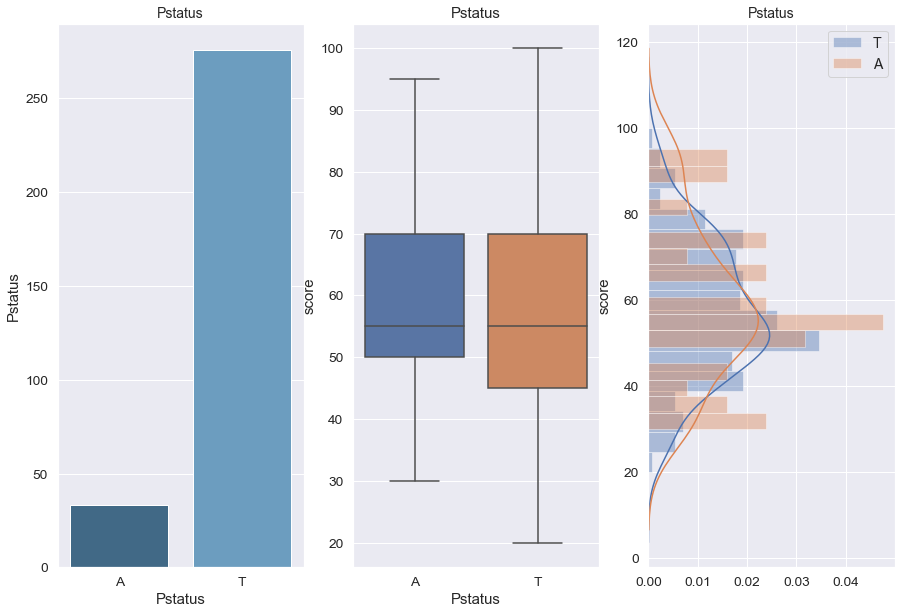

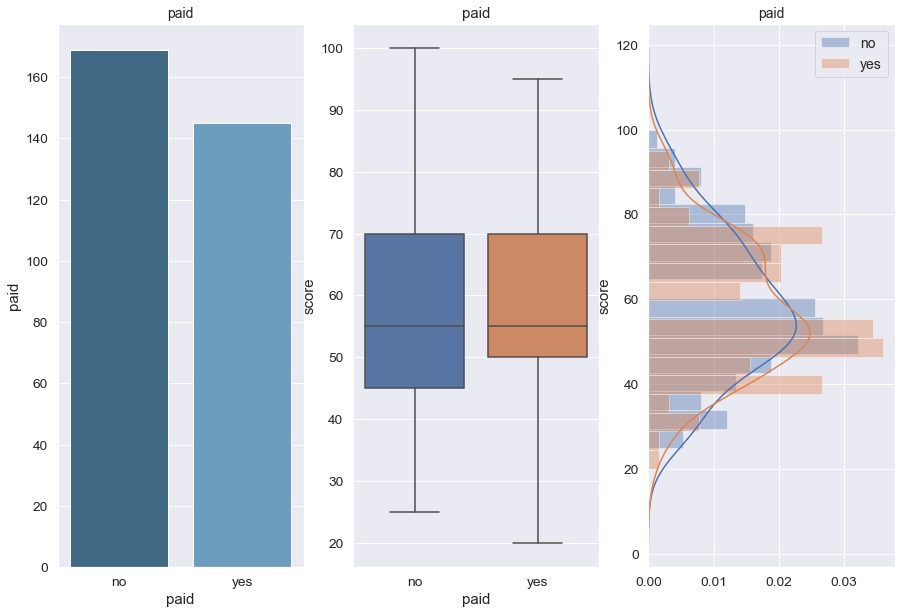

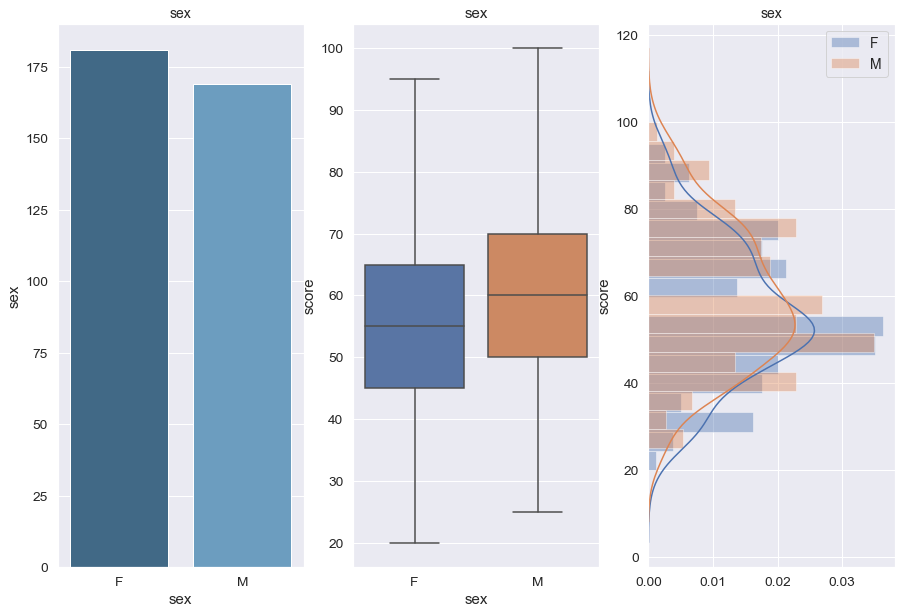

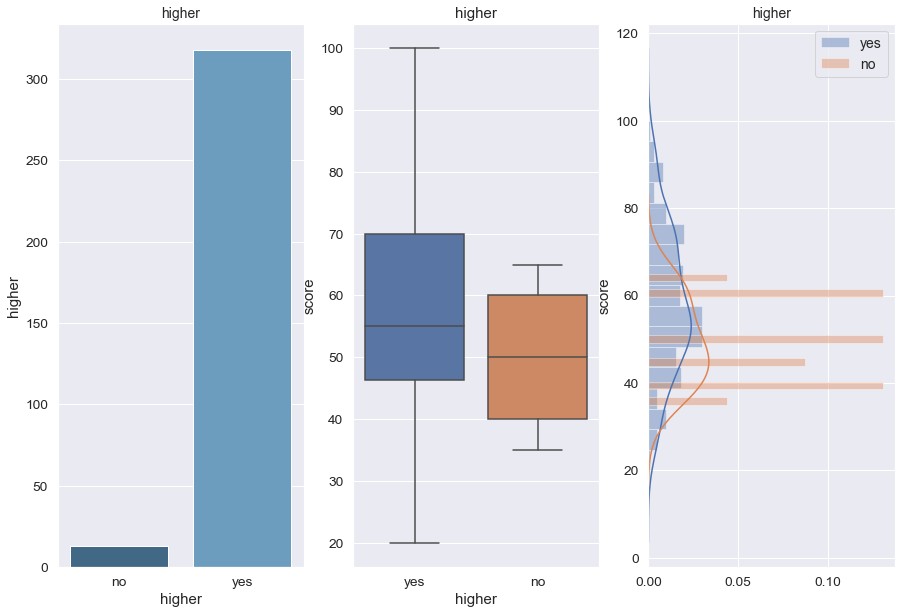

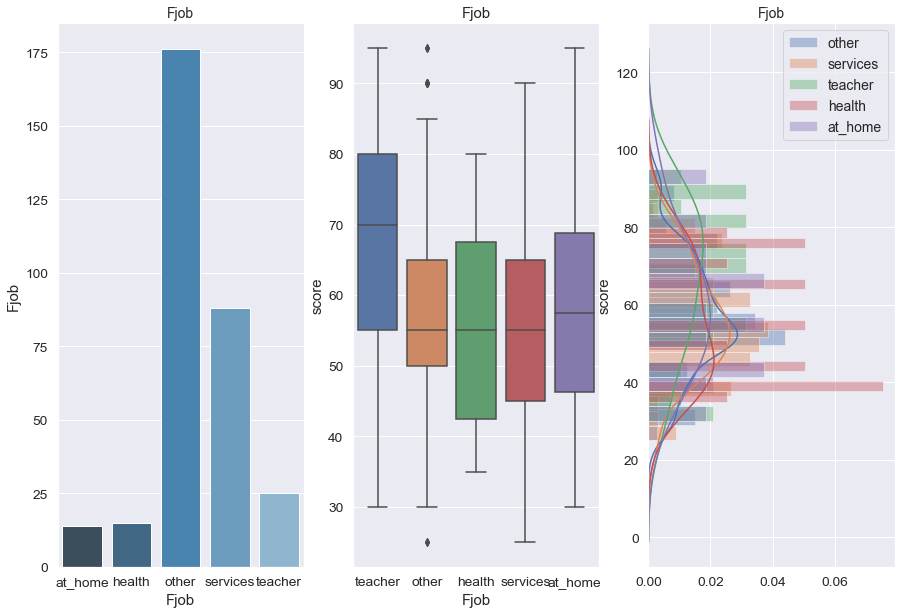

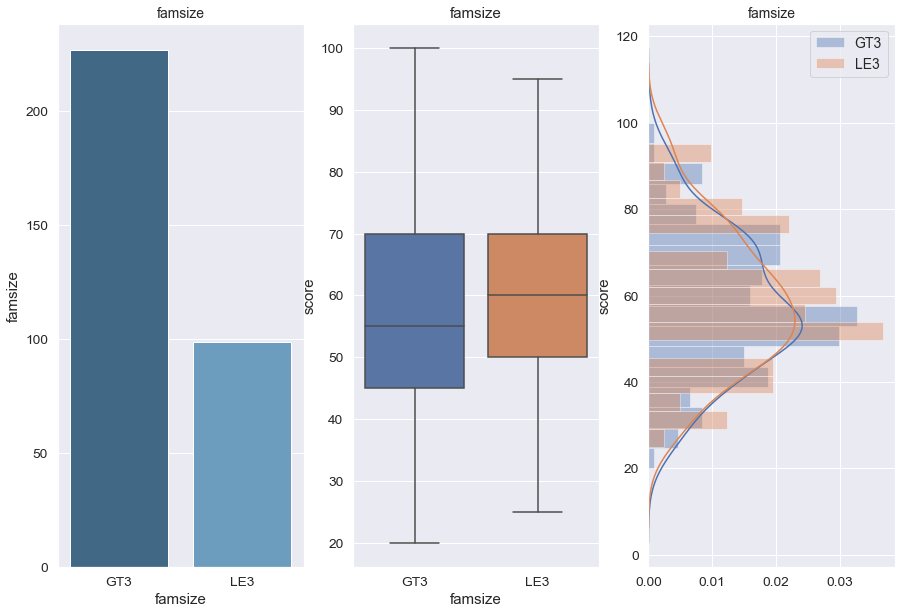

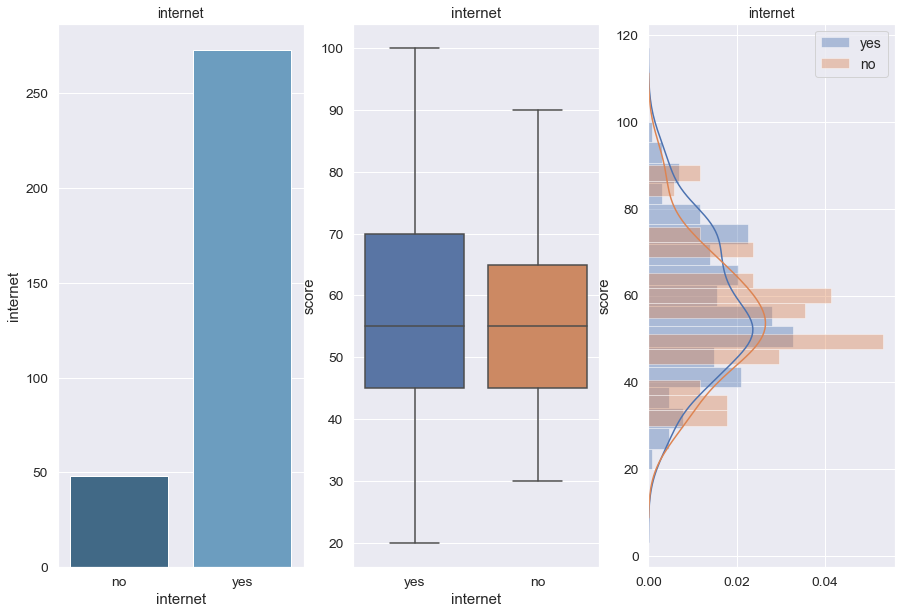

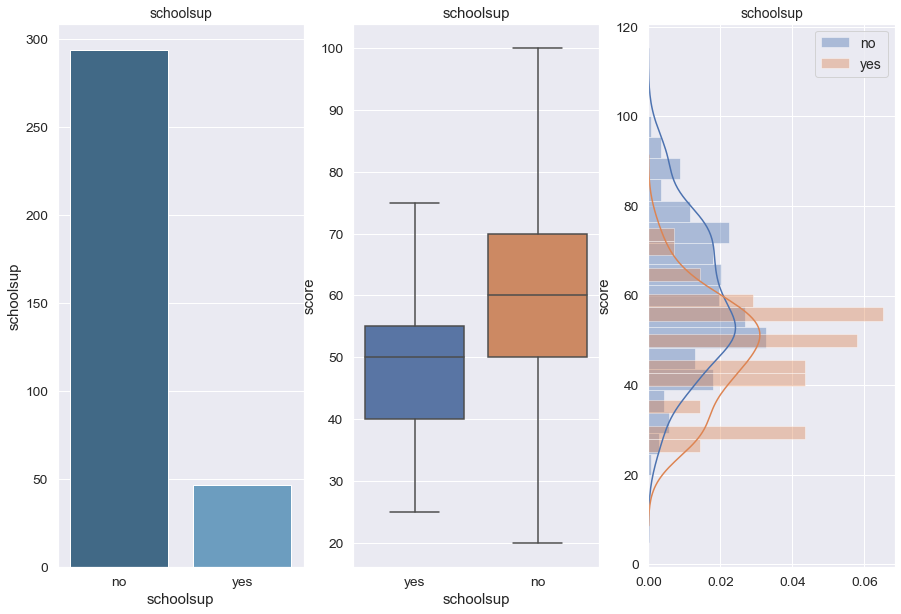

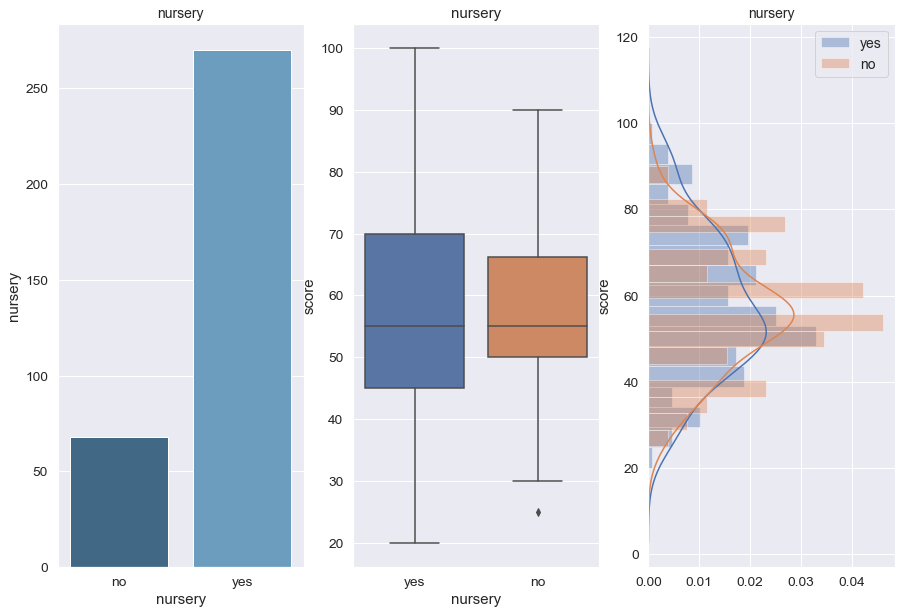

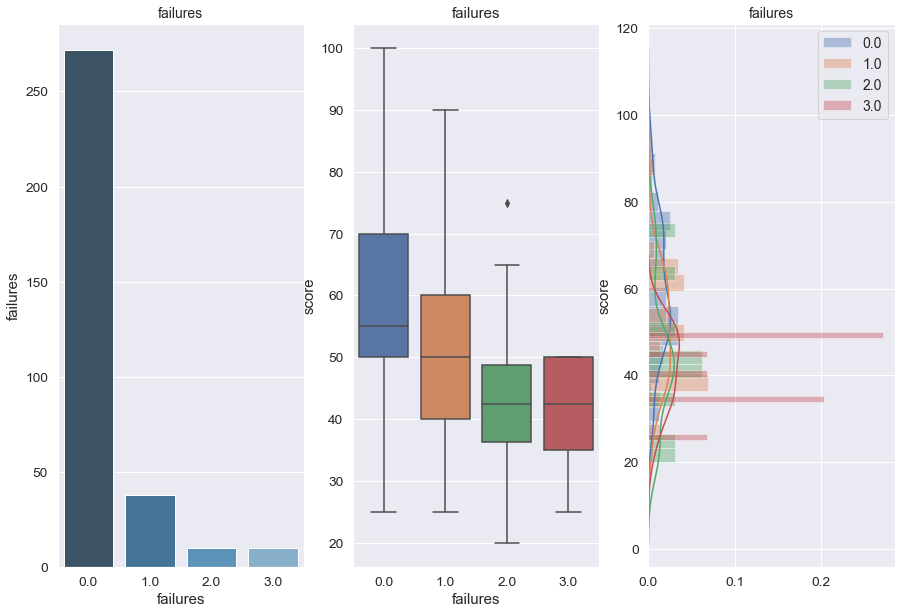

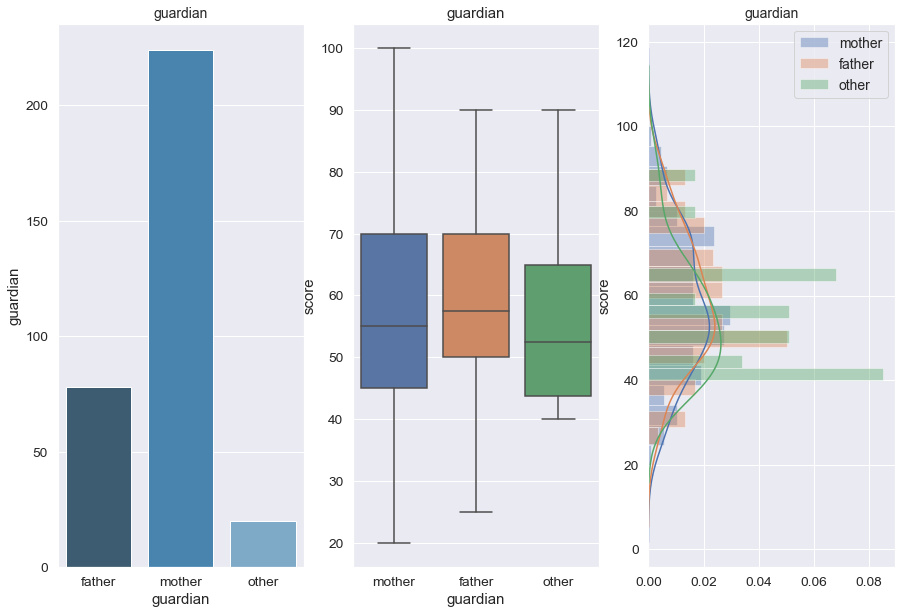

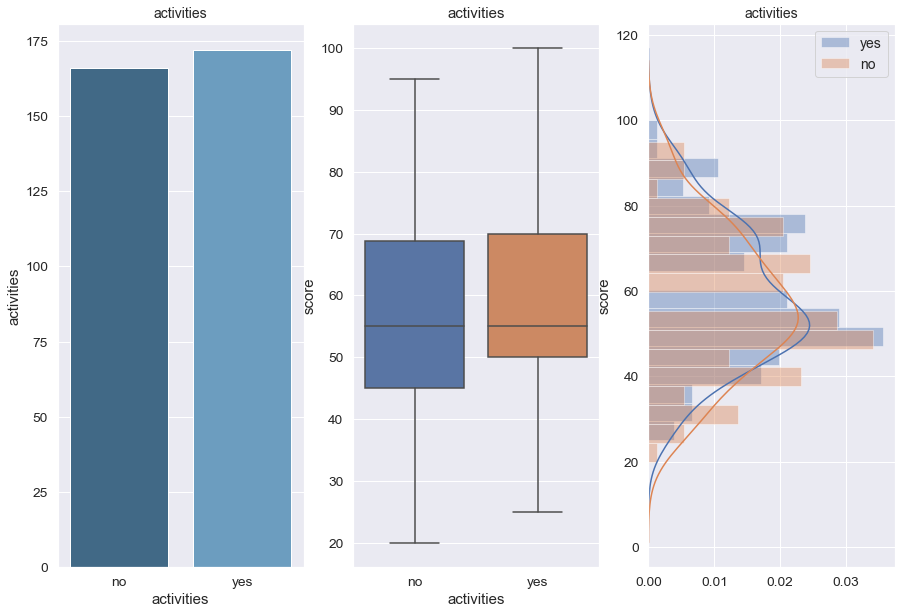

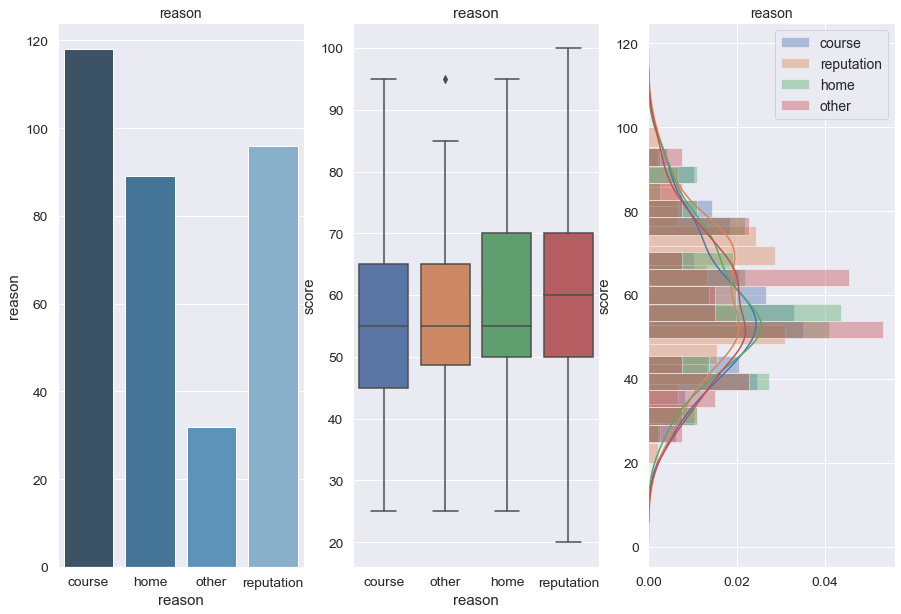

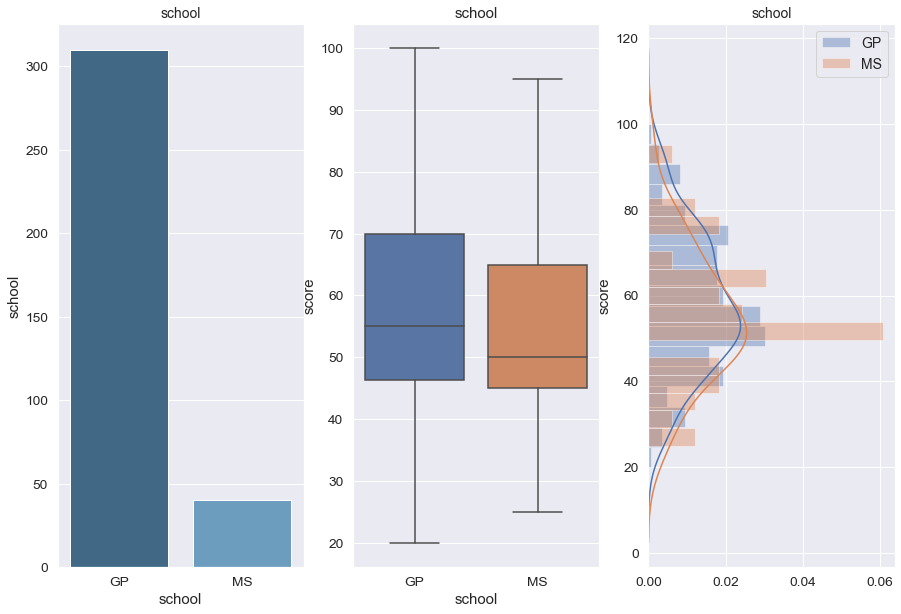

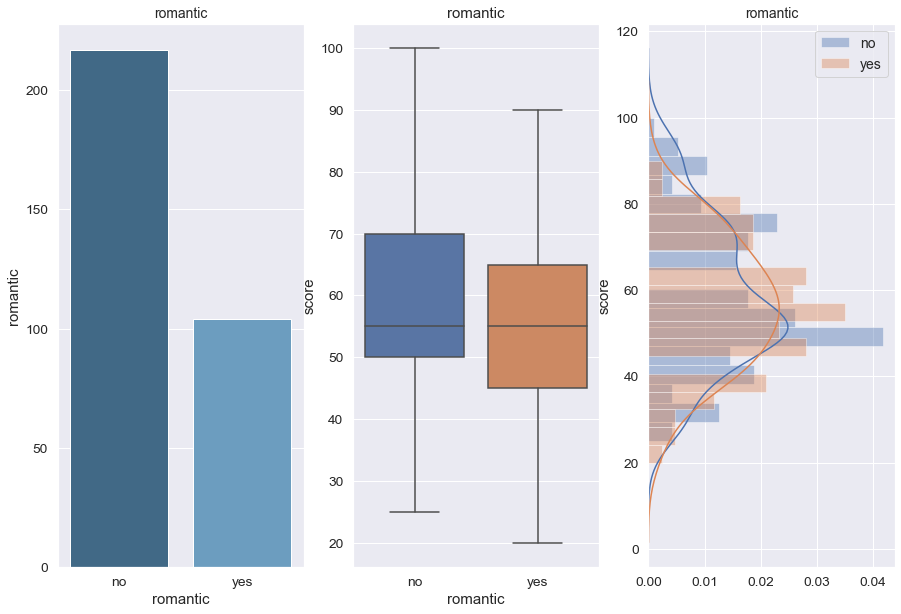

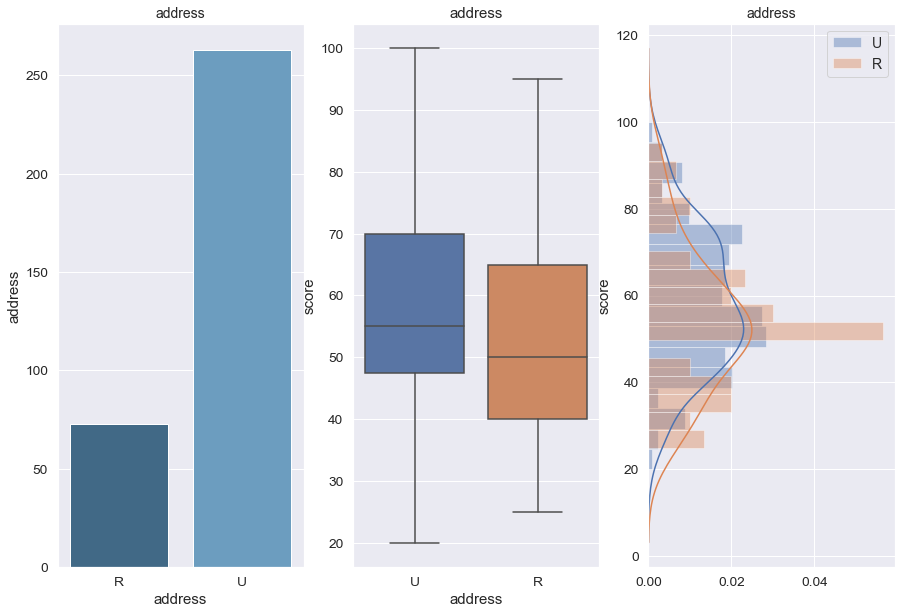

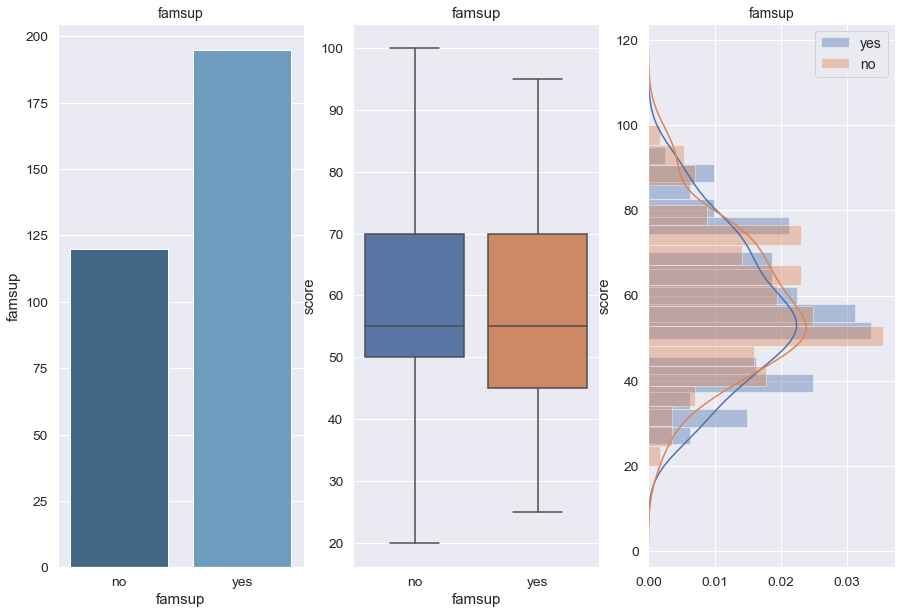

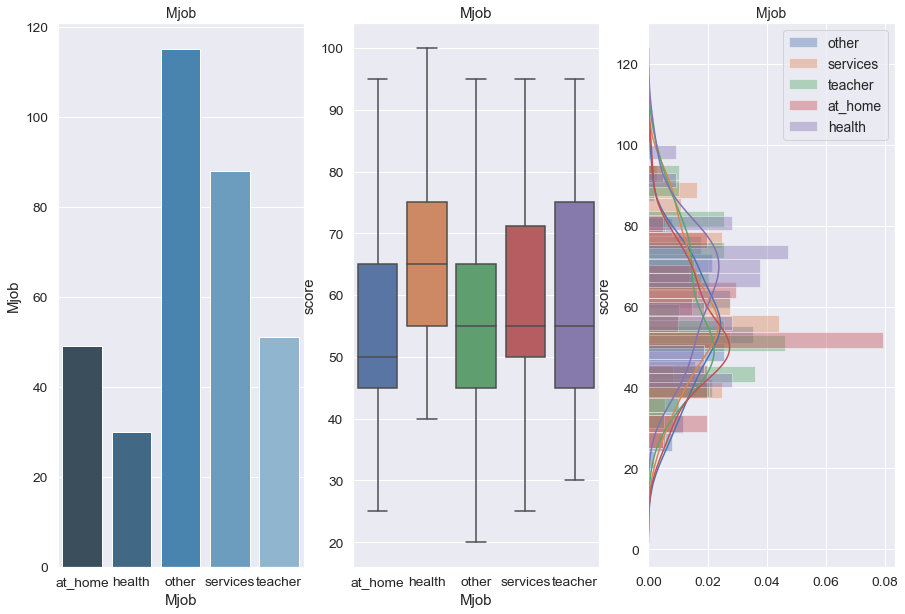

In [35]:
class_balance_threshold = 3

imbalance_features = []

for item in features_one_hot:
    imbalance = one_hot_variable_analysis(stud_math_present, item, target_name, 
                                          n_bins=17, class_balance_threshold=class_balance_threshold)
    if imbalance > class_balance_threshold:
        imbalance_features.append(item)
        
imbalance_features.append({'class_balance_threshold': class_balance_threshold})

Список категориальных неупорядоченных признаков, подозреваемых в дисбалансе классов и "порог подозреваемости":

In [36]:
imbalance_features

['Pstatus',
 'higher',
 'Fjob',
 'internet',
 'schoolsup',
 'nursery',
 'failures',
 'guardian',
 'school',
 'address',
 {'class_balance_threshold': 3}]

#### 3.2.2.1 Простейшее сравнение распределений.

Чтобы выяснить различаются ли распределения целевого признака для двух различных значений категориальной переменной применим следующий **простейший критерий**:

Будем считать распределения одинаковы если:
- средние отличаются менее, чем на половину кванта целелевого признака (`score`), т.е. менее чем на 2.5
- дисперсии отличаются менее, чем на квант целелевого признака (`score`), т.е. менее чем на 5.0.

In [37]:
def distrib_equality_simplest(df, item, target_name, threshold=5):
    means = df.groupby(item)[target_name].mean()
    if means.max() - means.min() > threshold/2:
        print("! Distributions for different values of '{}' are NOT similar:\n    mean.max() - mean.min() = {:.2f}"
              .format( item, means.max() - means.min() ))
        return False
    else:
        stds = df.groupby(item)[target_name].std()
        if stds.max() - stds.min() > threshold:
            print("! Distributions for different values of '{}' are NOT similar:\n    std.max() - std.min() = {:.2f}"
                  .format( item, stds.max() - stds.min() ))
            return False
        else:
            print("Distributions for different values of '{}' are SIMILAR:\n    mean.max() - mean.min() = {:.2f}\
                \n    std.max() - std.min() = {:.2f}"
                  .format(item, means.max() - means.min(), stds.max() - stds.min() ))
            return True

In [38]:
print('item', item)
print('target_name', target_name)
qw = distrib_equality_simplest(stud_math_present, item, target_name)
print(qw)

item Mjob
target_name score
! Distributions for different values of 'Mjob' are NOT similar:
    mean.max() - mean.min() = 10.59
False


In [39]:
useless_variables_simplest = []

for item in features_one_hot:
    print("\n"*3, "===", item, "===   ")
    distributions_are_equal = distrib_equality_simplest(stud_math_present, item, target_name)
#     print('distributions_are_equal', distributions_are_equal)
    if distributions_are_equal:
        print("TO DROP:", item)
        useless_variables_simplest.append(item)




 === Pstatus ===   
Distributions for different values of 'Pstatus' are SIMILAR:
    mean.max() - mean.min() = 1.40                
    std.max() - std.min() = 2.52
TO DROP: Pstatus



 === paid ===   
Distributions for different values of 'paid' are SIMILAR:
    mean.max() - mean.min() = 0.47                
    std.max() - std.min() = 1.39
TO DROP: paid



 === sex ===   
! Distributions for different values of 'sex' are NOT similar:
    mean.max() - mean.min() = 3.56



 === higher ===   
! Distributions for different values of 'higher' are NOT similar:
    mean.max() - mean.min() = 8.80



 === Fjob ===   
! Distributions for different values of 'Fjob' are NOT similar:
    mean.max() - mean.min() = 10.33



 === famsize ===   
Distributions for different values of 'famsize' are SIMILAR:
    mean.max() - mean.min() = 1.15                
    std.max() - std.min() = 0.19
TO DROP: famsize



 === internet ===   
! Distributions for different values of 'internet' are NOT similar:
  

Согласно простейшему критерию различимости распределений, различные значения некоторых переменных приводят к одинаковым распределениям целевого признака. То есть, различные значения переменной можно заменить на одно, а стало быть и вовсе можно отбросить эту переменную.

Список этих переменных:

In [40]:
useless_variables_simplest

['Pstatus', 'paid', 'famsize', 'nursery', 'activities', 'romantic', 'famsup']

In [41]:
stud_math_pres_simplest = stud_math_present.drop(useless_variables_simplest, axis=1)
features_one_hot_set_simplest = features_one_hot_set - set(useless_variables_simplest)
features_one_hot_simplest = list(features_one_hot_set)
stud_math_pres_simplest

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,schoolsup,"studytime, granular",higher,internet,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,...,yes,-6.0,yes,NaN,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,father,...,no,-6.0,yes,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,...,yes,-6.0,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,...,no,-9.0,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,father,...,no,-6.0,yes,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,3.0,1.0,teacher,services,course,mother,...,no,-6.0,yes,yes,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,3.0,1.0,services,services,course,mother,...,no,-3.0,yes,yes,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,1.0,1.0,other,other,course,NaN,...,NaN,-3.0,NaN,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,3.0,2.0,services,other,course,mother,...,no,-3.0,yes,yes,4.0,4.0,1.0,5.0,0.0,50.0


#### 3.2.2.2 Статистическое сравнение распределений

**Чтобы выяснить различаются ли распределения** целевого признака для двух различных значений категориальной переменной **статистическими методами** надо проверить следующие гипотезы:

1. Нормально ли распределение (Критерий Шапиро-Уилка) `scipy.stats import shapiro`
2. Если да (распределения нормальны), то: Равны ли дисперсии (критерий Бартлетта, средние неизвестны) `scipy.stats.bartlett`
3. Если да (дисперсии равны), то: Равны ли средние (критерий Стьюдента) `scipy.stats.ttest_rel`


1. Если нет (распределения ненормальны), то (возможны варианты по размеру выборок), например:
2. Равны ли дисперсии (критерий Левене, средние неизвестны) `scipy.stats.levene`
3. Если да (дисперсии равны), то: Равны ли средние (критерий Уэлча) - реализация в `scipy` мне неизвестна

Поскольку, как говорилось, возможны варианты, то дальше могут быть ещё цепочки *если, то*.

Реализуем функцию, выполняющую описанную выше статистическую проверку равенства распределений классов признака. Она должна возвращать таблицу (квадратную матрицу) с классами как индексы строк и столбцов и значениями: 1 (эквивалентно ответу *True* на вопрос: "Распределения соответствующих классов статистически неразаличимы?") - и 0 (эквивалентно ответу *False).

In [42]:
from scipy.stats import shapiro, bartlett, ttest_ind_from_stats, levene



def check_normality(x, alpha):
    stat, p_value = shapiro(x)
    if p_value > alpha:
        return True # Sample looks Gaussian
    else:
        return False # Sample does NOT look Gaussian


def normal_std_are_equal(x, y, alpha):
    stat, p_value = bartlett(x, y)
    if p_value > alpha:
        return True # Deviations of normal samples are equal
    else:
        return False # Deviations of normal samples are NOT equal

    
    
def normal_means_are_equal(x, y, alpha):
    stat, p_value = ttest_ind_from_stats(x.mean(), x.std(), len(x), y.mean(), y.std(), len(y), equal_var=True)
    if p_value > alpha:
        return True # Means of normal samples are equal
    else:
        return False # Means of normal samples are NOT equal

        
def abnormal_std_are_equal(x, y, alpha):
    stat, p_value = levene(x, y)
    if p_value > alpha:
        return True # Deviations of samples are equal
    else:
        return False # Deviations of samples are NOT equal


def abnormal_means_are_equal(x, y, alpha):
    
    # I do not the Welch's test in SciPy, therefore my test wil be as follows
    # 1. Claculate the standard deviation (std_{xy}) for joined sample of x and y.
    # 2. If abs( y.mean() - x.mean() ) < alpha * std_{xy}, then x and y are similar, otherwise they are not
    
    x = np.array(x).flatten()    
    y = np.array(y).flatten()
    xy = np.hstack((x, y))
    
    if np.abs( y.mean() - x.mean() ) < alpha*xy.std():
        return True # Means of normal samples are equal
    else:
        return False # Means of normal samples are NOT equal



def distrib_equality(tested_series, alpha):
    n_var = len(tested_series.value_counts().index)
    equality_matrix = np.eye((n_var))

    for i in range(n_var - 1):
        instance_x = tested_series.value_counts().index[i]
        x = df[ tested_series == instance_x ][target_name]
        for j in range(n_var):
            if j > i:
                instance_y = tested_series.value_counts().index[j]
                y = df[ tested_series == instance_y ][target_name]
                normality_x = check_normality(x, alpha)
                normality_y = check_normality(y, alpha)
#                 print("Does '{}' with {} entities is distributed normally? - {}"
#                       .format( instance_x, len(x), normality_x ))
#                 print("Does '{}' with {} entities is distributed normally? - {}"
#                       .format( instance_y, len(y), normality_y ))
#                 print("Does '{}' and {} are distributed normally both? - {}"
#                       .format( instance_x, instance_y, normality_x & normality_y ))


                if normality_x & normality_y:
                    #
                    # both distributions are normal = True
                    #
                    equal_std = normal_std_are_equal(x, y, alpha)
#                     print("  Does '{}' and '{}' have the same STD? - {}"
#                           .format( instance_x, instance_y, equal_std ))

                    if equal_std:
                        equal_mean = normal_means_are_equal(x, y, alpha)
#                         print("    Does '{}' and '{}' have the same MEAN? - {}"
#                               .format( instance_x, instance_y, equal_mean ))
                        if equal_mean:
                            equality_matrix[i][j] = 1
                            equality_matrix[j][i] = 1

                else:
                    #
                    # both distributions are normal = False
                    #
                    equal_std = abnormal_std_are_equal(x, y, alpha)
#                     print("__Does '{}' and '{}' have the same STD? - {}"
#                           .format( instance_x, instance_y, equal_std ))
                    if equal_std:
                        equal_mean = abnormal_means_are_equal(x, y, alpha)
#                         print("____Does '{}' and '{}' have the same MEAN? - {}"
#                               .format( instance_x, instance_y, equal_mean ))
                        if equal_mean:
                            equality_matrix[i][j] = 1
                            equality_matrix[j][i] = 1
            
#                 print("\n"*2, "=== "*3)

    equality_df = pd.DataFrame(equality_matrix, columns=tested_series.value_counts().index, 
                               index=tested_series.value_counts().index , dtype=int)
    return equality_df

In [43]:
### Just to check

df = stud_math_present
target_name = 'score'
item = 'reason'

print(item)
df[item].value_counts()

alpha = 0.05
tested_series = df[item]

eqaulity_df = distrib_equality(tested_series, alpha)
eqaulity_df

reason


,course,reputation,home,other
course,1,0,0,1
reputation,0,1,0,1
home,0,0,1,0
other,1,1,0,1


In [44]:
if eqaulity_df.sum().sum() < len(eqaulity_df)**2:
    print("All values are not equal, they have different distributions.")
else:
    print("All distributions for values are equal! \n \
    There is no difference between other values in this column and you can drop this feature. ")

All values are not equal, they have different distributions.


In [45]:
alpha = 0.05

useless_variables_stat = []

for item in features_one_hot:
    eqaulity_df = distrib_equality(stud_math_present[item], alpha)
    if eqaulity_df.sum().sum() < len(eqaulity_df)**2:
        print(item, ": All values are not equal, they have different distributions.\n")
    else:
        useless_variables_stat.append(item)
        print(item, ": All distributions for values are equal! \n \
        There is no difference between other values in this column and you can drop this feature.\n")

Pstatus : All values are not equal, they have different distributions.

paid : All distributions for values are equal! 
         There is no difference between other values in this column and you can drop this feature.

sex : All values are not equal, they have different distributions.

higher : All values are not equal, they have different distributions.

Fjob : All values are not equal, they have different distributions.

famsize : All values are not equal, they have different distributions.

internet : All values are not equal, they have different distributions.

schoolsup : All values are not equal, they have different distributions.

nursery : All values are not equal, they have different distributions.

failures : All values are not equal, they have different distributions.

guardian : All values are not equal, they have different distributions.

activities : All values are not equal, they have different distributions.

reason : All values are not equal, they have different distr

Согласно статистическому критерию различимости распределений лишь одна переменная имеет статистически неразличимые классы и это:

In [46]:
useless_variables_stat

['paid']

In [47]:
stud_math_pres_stat = stud_math_present.drop(useless_variables_stat, axis=1)
features_one_hot_set_stat = features_one_hot_set - set(useless_variables_stat)
features_one_hot_stat = list(features_one_hot_set_stat)
stud_math_pres_stat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Дальше будем работать с данными **stud_math_pres_stat** - когда идентичность распределений классов проверялась статистически.

## 4 Корреляционная матрица

Корреляционная матрица может помочь выявить либо сильную связь величин, либо заподозрить отсутствия взаимосвязи между величинами.

In [48]:
corr_matrix = stud_math_pres_stat.corr()
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.119805,-0.126771,1.006847e-01,-0.011198,0.219082,0.011198,0.061178,-0.009554,0.116400,-6.008110e-02,0.211007,-0.125073
Medu,-0.119805,1.000000,0.607425,-1.687540e-01,0.070391,-0.203566,-0.070391,-0.008563,0.024449,0.078836,-3.818591e-02,0.073974,0.189611
Fedu,-0.126771,0.607425,1.000000,-1.459770e-01,-0.010801,-0.267314,0.010801,-0.012054,-0.027535,0.048275,1.973149e-02,0.029999,0.132700
traveltime,0.100685,-0.168754,-0.145977,1.000000e+00,-0.101815,0.097375,0.101815,-0.031726,-0.020219,0.027433,-9.164625e-17,-0.007783,-0.074284
studytime,-0.011198,0.070391,-0.010801,-1.018153e-01,1.000000,-0.157706,-1.000000,0.057521,-0.129052,-0.030048,-8.550523e-02,-0.078282,0.142932
failures,0.219082,-0.203566,-0.267314,9.737545e-02,-0.157706,1.000000,0.157706,-0.006089,0.114818,0.119779,6.146773e-02,0.136301,-0.285775
"studytime, granular",0.011198,-0.070391,0.010801,1.018153e-01,-1.000000,0.157706,1.000000,-0.057521,0.129052,0.030048,8.550523e-02,0.078282,-0.142932
famrel,0.061178,-0.008563,-0.012054,-3.172642e-02,0.057521,-0.006089,-0.057521,1.000000,0.152812,0.029717,1.043711e-01,-0.063147,0.055476
freetime,-0.009554,0.024449,-0.027535,-2.021871e-02,-0.129052,0.114818,0.129052,0.152812,1.000000,0.294042,7.099844e-02,-0.081612,-0.007407
goout,0.116400,0.078836,0.048275,2.743342e-02,-0.030048,0.119779,0.030048,0.029717,0.294042,1.000000,-1.344627e-02,0.044601,-0.173015


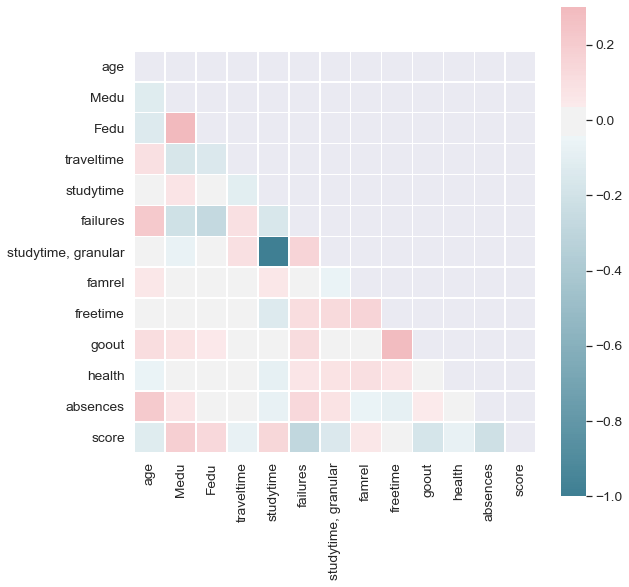

In [49]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)#, cbar_kws={"shrink": .5})

In [50]:
for item in ['traveltime', 'studytime, granular', 'health']:
    print(item, "\n", abs(corr_matrix[item]).sort_values(ascending=False)[1:], "\n"*2)

traveltime 
 Medu                   1.687540e-01
Fedu                   1.459770e-01
studytime              1.018153e-01
studytime, granular    1.018153e-01
age                    1.006847e-01
failures               9.737545e-02
score                  7.428418e-02
famrel                 3.172642e-02
goout                  2.743342e-02
freetime               2.021871e-02
absences               7.783288e-03
health                 9.164625e-17
Name: traveltime, dtype: float64 


studytime, granular 
 studytime     1.000000
failures      0.157706
score         0.142932
freetime      0.129052
traveltime    0.101815
health        0.085505
absences      0.078282
Medu          0.070391
famrel        0.057521
goout         0.030048
age           0.011198
Fedu          0.010801
Name: studytime, granular, dtype: float64 


health 
 famrel                 1.043711e-01
studytime, granular    8.550523e-02
studytime              8.550523e-02
score                  7.313494e-02
freetime               

Подозрение на корреляцию `studytime, granular` с `studytime` подтвердилось: корреляция абсолютна. Поэтому отбросим `studytime, granular`.

Останется 28 признаков.

In [51]:
stud_math_pres_stat = stud_math_pres_stat.drop(['studytime, granular'], axis=1)
features_ordinal_set = features_ordinal_set - set(['studytime, granular'])
features_ordinal = list(features_ordinal_set)
stud_math_pres_stat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Для наглядности расположим признаки по убыванию коэффициента линейной корреляции с целевым признаком. Это покажет степень *линейного* влияния переменной (для которой можно вообще вычислить коэффициент линейной корреляции Пирсона) на целевой признак.

In [52]:
abs(corr_matrix['score']).sort_values(ascending=False)[1:]

failures               0.285775
absences               0.214926
Medu                   0.189611
goout                  0.173015
studytime              0.142932
studytime, granular    0.142932
Fedu                   0.132700
age                    0.125073
traveltime             0.074284
health                 0.073135
famrel                 0.055476
freetime               0.007407
Name: score, dtype: float64

Полноты ради построим `pairplot`, хотя в нашем случае (обилие категориальных переменных, `scatterplot` для численных переменных уже построены) это вряд и даст дополнительную информацию. Да и уникальных графиков будет $11 \cdot 10/2 =55$ штук... Не так много как могло бы, но ... Обычно польза от подобного сорта графиков бывает для численных (*непрерывных*) переменных. Но чем чёрт не шутит...

Wall time: 12 s


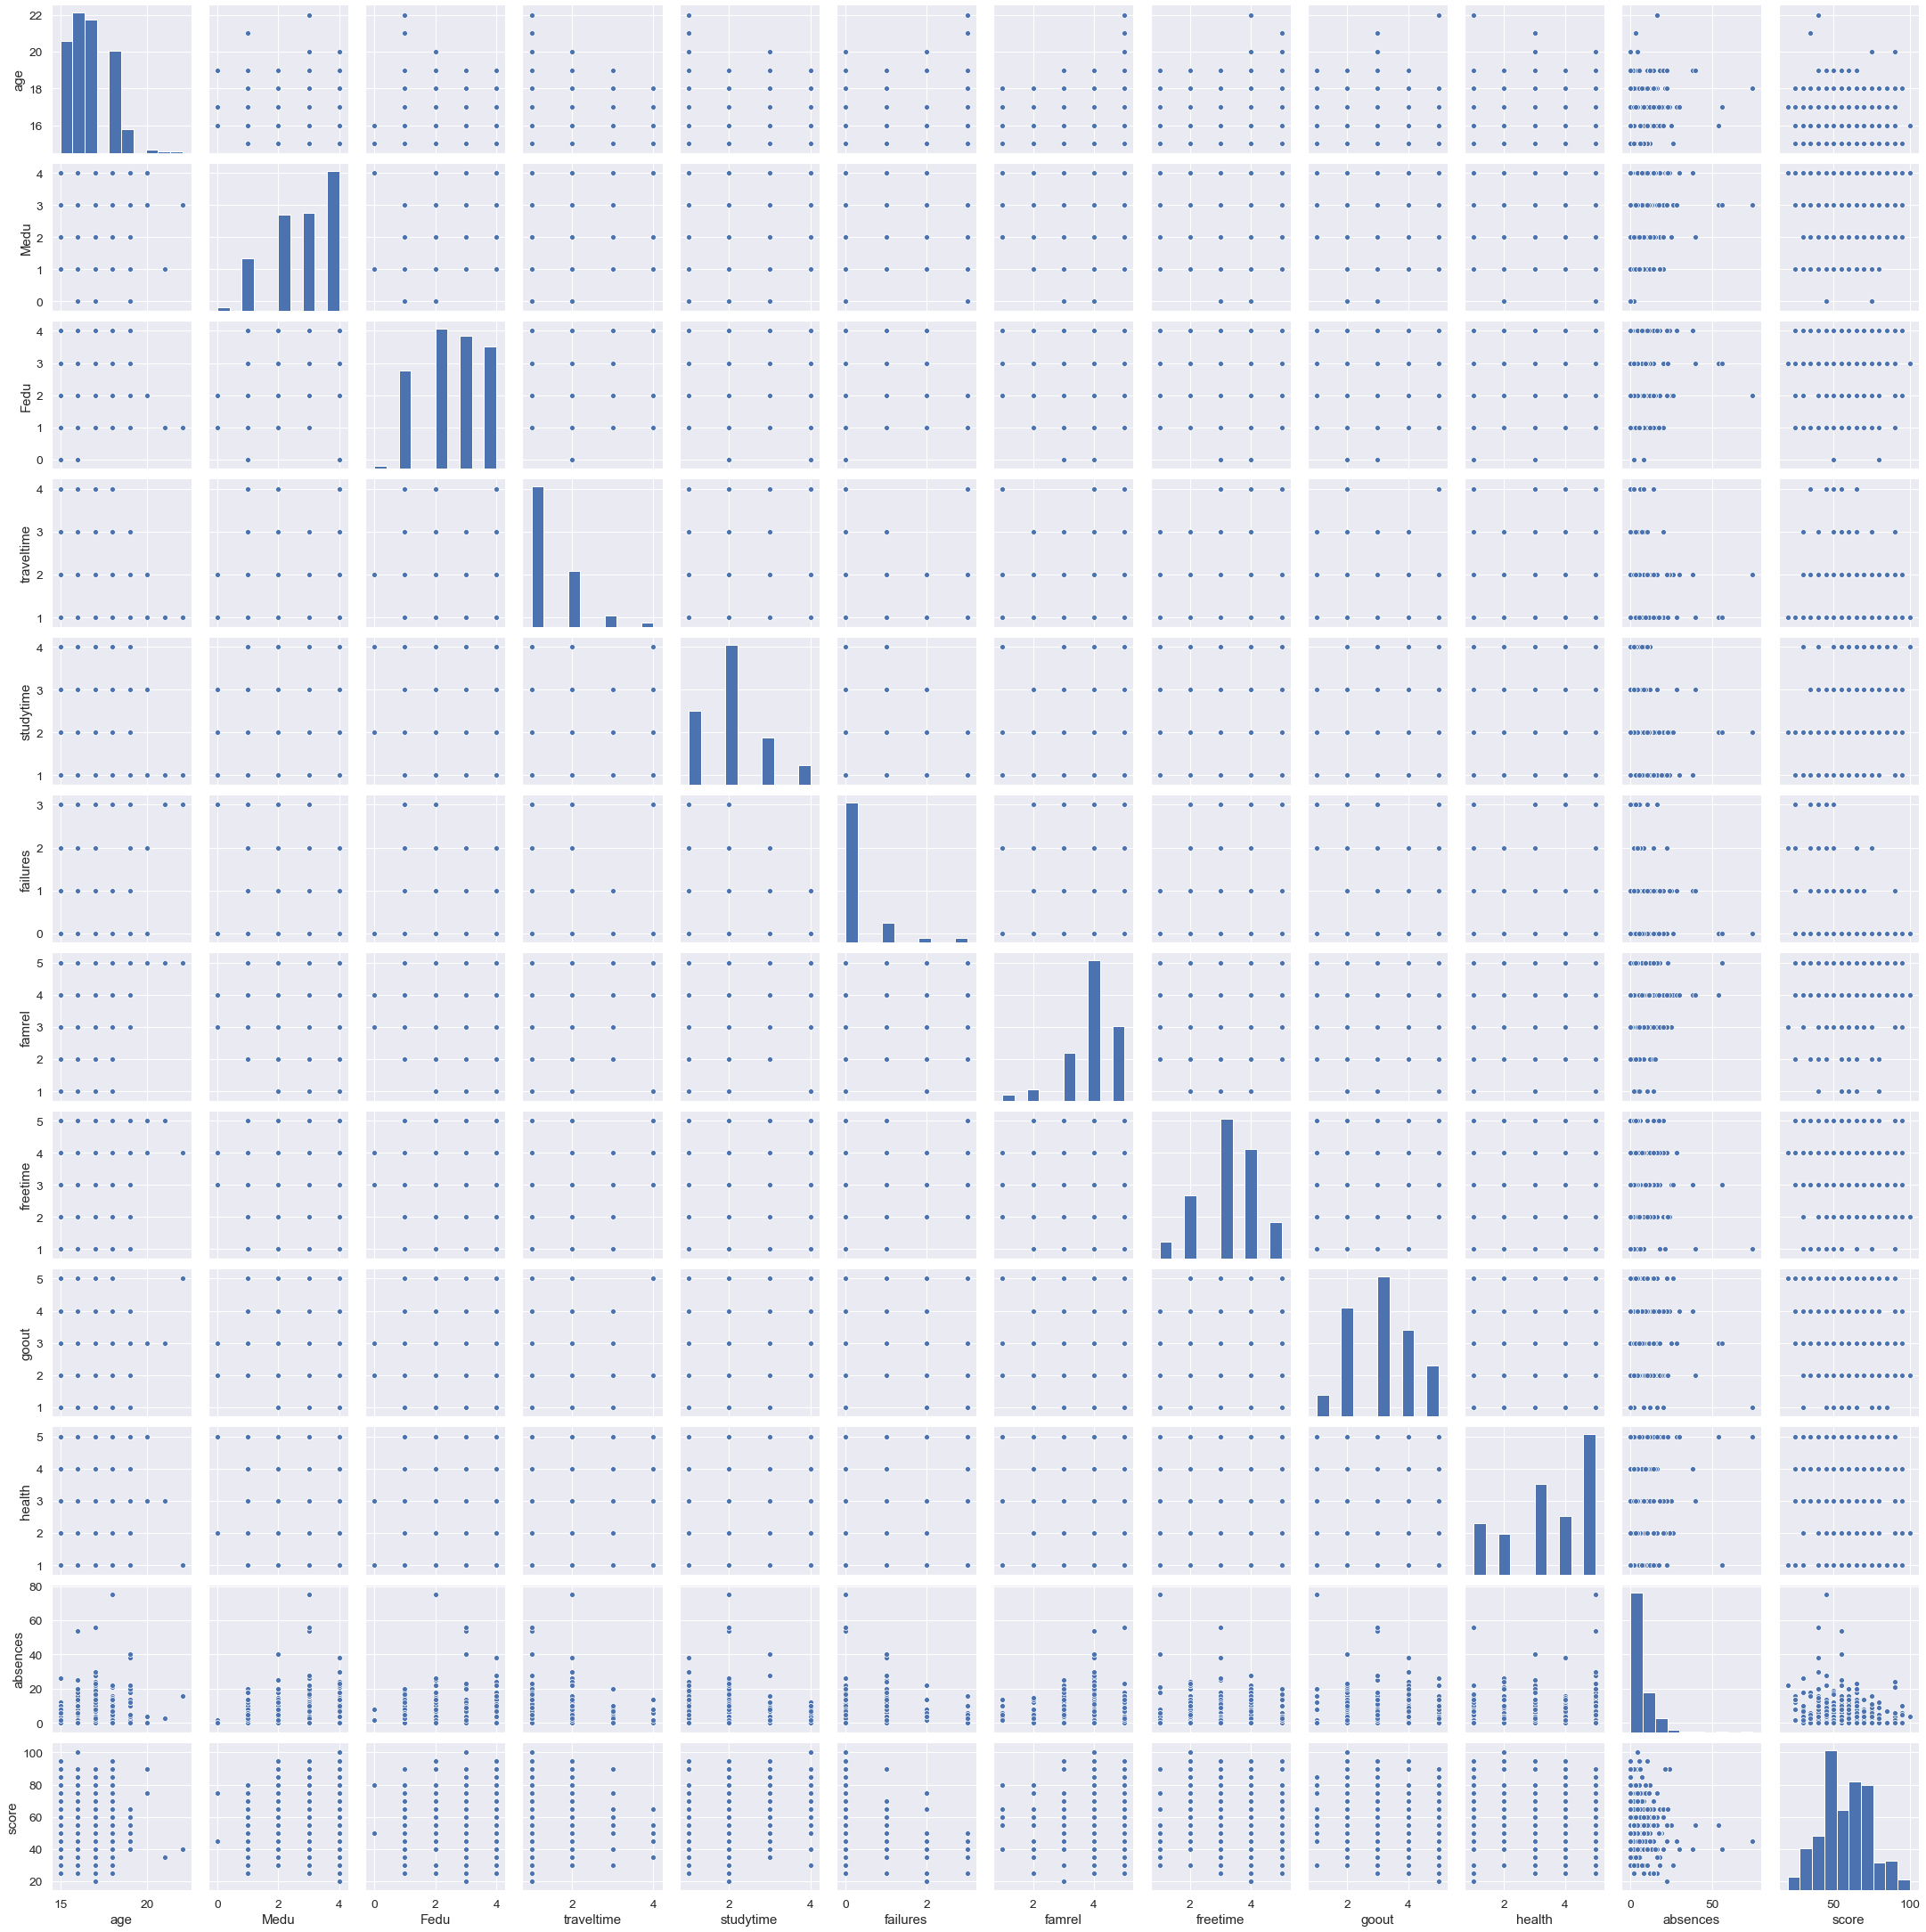

In [53]:
%%time

sns.pairplot(stud_math_pres_stat)

Не шутит... Новой информации я не обнаружил.

## 5. Окончательное решение вопроса с пропусками

Снова проверим количество пропусков в оставшейся таблице.

In [54]:
stud_math_pres_stat.isna().sum()

school         0
sex            0
age            0
address       14
famsize       24
Pstatus       41
Medu           2
Fedu          21
Mjob          17
Fjob          32
reason        15
guardian      28
traveltime    23
studytime      7
failures      20
schoolsup      9
famsup        35
activities    12
nursery       12
higher        19
internet      29
romantic      29
famrel        24
freetime       8
goout          6
health        13
absences      10
score          0
dtype: int64

In [55]:
print("Максимальное количество пропусков ({} - {:.1%}) в признаке '{}'."
      .format( stud_math_pres_stat.isna().sum().max(), 
              stud_math_pres_stat.isna().sum().max()/len(stud_math_present),
              stud_math_pres_stat.isna().sum().idxmax() ))

Максимальное количество пропусков (41 - 11.7%) в признаке 'Pstatus'.


Поскольку максимальное количество пропусков (41 в признаке 'Pstatus') составляет - 11.7%, казалось бы можно просто удалить пропуски. В частности неопределенность выборки увеличится всего на 5% ($1/\sqrt{1-0.117}\simeq 1.064$).

Однако пропуски разбросаны по разным признакам и по записям они могут не пересекаться. Проверим сколько записей удалится при применении `dropna()`.

In [56]:
drop_mask = stud_math_pres_stat.isna().sum(axis=1)

def drop_mask_create(x):
    if x > 0:
        return True
    else:
        return False

drop_mask = drop_mask.apply(drop_mask_create)
print("Application of the 'dropna()', will result in dropping of {} entries ({:.1%})."
      .format( drop_mask.sum(), drop_mask.sum()/len(drop_mask) ))

Application of the 'dropna()', will result in dropping of 248 entries (70.9%).


Если мы применим 'dropna()', то удалим 248 записей, что уже 70.9%, а это - неприемлимо.

Пропуски надо заменить. Из известных мне способов:
- заменой на константу (SimpleImputer)
- заменой по методу k ближайших соседей (KNNImputer)
- заменой по распределению

сначала выберем первый, поскольку замена методом KNN требует работы с нормализованными числовыми данными. А чтобы провести процедуру нормализации, надо сначала закодировать категориальные признаки. А `OrdinalEncoder` не работает с данными содержащими пропуски. Замена по распределению требует большой возни по подбору и аппроксимации распределений, оставим её на потом, когда будет возможность.

## 5.1 Замена пропусков на постоянное значение

Проведём простейшую замену пропусков с помощью `fillna()` на постоянное значение:
- Для численных переменных заменим пропуски на среднее значение. Хотя такая замена и исказить распределения, но хотя бы оставит неизменным среднее и потенциальная модель будет неплохо предсказывать результаты для входных данных близким к средним.
- Для категориальных переменных заменим пропуски на наиболее частое значение. Это может увеличит дисбаланс классов, зато в силу большого числа данных меньше исказит распределение. После замены пропусков надо будет вновь (окончательно) проверить дисбаланс классов.

In [57]:
stud_math_const = stud_math_pres_stat.copy()

In [58]:
for item in features_numerical:
    stud_math_const[item] = stud_math_const[item].fillna(value=stud_math_const[item].mean())

In [59]:
for item in features_ordinal:    
    print("In '{}' NA is substituted with {}.".format(item, stud_math_const[item].value_counts().idxmax()), "\n")
    stud_math_const[item] = stud_math_const[item].fillna(value=stud_math_const[item].value_counts().idxmax())

In 'studytime' NA is substituted with 2.0. 

In 'Medu' NA is substituted with 4.0. 

In 'traveltime' NA is substituted with 1.0. 

In 'goout' NA is substituted with 3.0. 

In 'famrel' NA is substituted with 4.0. 

In 'freetime' NA is substituted with 3.0. 

In 'health' NA is substituted with 5.0. 

In 'Fedu' NA is substituted with 2.0. 



In [60]:
for item in features_one_hot_stat:
    print("In '{}' NA is substituted with '{}'.".format(item, stud_math_const[item].value_counts().idxmax()), "\n")
    stud_math_const[item] = stud_math_const[item].fillna(value=stud_math_const[item].value_counts().idxmax())

In 'Pstatus' NA is substituted with 'T'. 

In 'Fjob' NA is substituted with 'other'. 

In 'internet' NA is substituted with 'yes'. 

In 'schoolsup' NA is substituted with 'no'. 

In 'nursery' NA is substituted with 'yes'. 

In 'Mjob' NA is substituted with 'other'. 

In 'guardian' NA is substituted with 'mother'. 

In 'school' NA is substituted with 'GP'. 

In 'higher' NA is substituted with 'yes'. 

In 'sex' NA is substituted with 'F'. 

In 'famsize' NA is substituted with 'GT3'. 

In 'failures' NA is substituted with '0.0'. 

In 'reason' NA is substituted with 'course'. 

In 'romantic' NA is substituted with 'no'. 

In 'address' NA is substituted with 'U'. 

In 'famsup' NA is substituted with 'yes'. 

In 'activities' NA is substituted with 'yes'. 



## 5.2 Замена пропусков с помощью моделирования распределения

### 5.2.1 Моделирование плотности вероятности непрерывных распределений

In [61]:
stud_math_stat = stud_math_pres_stat.copy()

In [62]:
# Origin: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
# with slight modification

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import time
# import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, n_bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=n_bins, density=True)
    print(x)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    print("x_min={}; x_max={}, N_x={}".format(x.min(), x.max(), len(x)))

    # Distributions to check
    # You can update this list from 
    # https://docs.scipy.org/doc/scipy/reference/stats.html
    distributions = [        
        st.alpha, st.anglit, st.arcsine,
        st.beta, st.betaprime, st.bradford, st.burr, st.burr12,
        st.cauchy, st.chi, st.chi2, st.cosine, st.crystalball,
        st.dgamma, st.dweibull,
        st.erlang, st.expon, st.exponnorm, st.exponweib, st.exponpow,
        st.f, st.fatiguelife, st.fisk, st.foldcauchy, st.foldnorm, st.frechet_r, st.frechet_l,
        st.genlogistic, st.genpareto, st.gennorm, st.genexpon, st.genextreme, st.gausshyper,
        st.gamma, st.gengamma, st.genhalflogistic, st.geninvgauss, st.gilbrat, st.gompertz, st.gumbel_r, st.gumbel_l,
        st.halfcauchy, st.halflogistic, st.halfnorm, st.halfgennorm, st.hypsecant,
        st.invgamma, st.invgauss, st.invweibull,
        st.johnsonsb, st.johnsonsu,
        st.kappa4, st.kappa3, st.ksone, st.kstwobign,
        st.laplace, st.levy, st.levy_l, 
        # st.levy_stable,  ## too long or impossible
        st.logistic, st.loggamma, st.loglaplace, st.lognorm, st. loguniform, st.lomax,
        st.maxwell, st.mielke, st.moyal, 
        st.nakagami, st.ncx2, st.ncf, st.nct, st.norm, st.norminvgauss, 
        st.pareto, st.pearson3, st.powerlaw, st.powerlognorm, st.powernorm,
        st.rdist, st.rayleigh, st.rice, st.recipinvgauss,
        st.semicircular, st.skewnorm, 
        st.t, st.trapz, st.triang, st.truncexpon, st.truncnorm, st.tukeylambda,
        st.uniform,
        st.vonmises, st.vonmises_line,
        st.wald, st.weibull_min, st.weibull_max, st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    k_distr = 0
    n_distr = len(distributions)
    t0 = time.time()
    for distribution in distributions:
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass
        
        print("Distribution fitting: |{}{}| {:.1%} {:.3f} sec. SSE = {:.6f} for '{}'."
              .format("#"*int(40*k_distr/n_distr), " "*(40-int(40*k_distr/n_distr)), k_distr/n_distr, 
                      time.time()-t0, best_sse, str(distributions[k_distr])[32:-34]))        
        k_distr += 1
    return (best_distribution.name, best_params, best_sse)


def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


def plot_fit_pdf(data, n_bins=200):    
    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=n_bins, density=True, alpha=0.5)
    # Save plot limits
    dataYLim = ax.get_ylim()
    
    # Find best fit distribution
    best_fit_name, best_fit_params, best_sse = best_fit_distribution(data, n_bins, ax)
    best_dist = getattr(st, best_fit_name)
    
    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(item)
    
    # Make PDF with best params 
    pdf = make_pdf(best_dist, best_fit_params)
    

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=n_bins, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)
    
    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
    dist_str = '{}({})'.format(best_fit_name, param_str)
    ax.set_title("Distribution of {} with fitting by {}".format(item, dist_str))
    return (best_fit_name, best_fit_params, best_sse)

"Подгонка" плотности вероятности в случае малого числа данных становится весьма чувствительной к способу моделирования "экспериментальной" плотности вероятности - в данном методе - к числу корзин гистограммы.

В частности, это демонстрируется ниже для  признака 'age' (bins=[7, 8, 9]). Очевидно, что совпадение числа корзин с числом "экспериментальных" значений даёт лучший результат, но примечательна принципиальная разница в ответе при изменении числа корзин всего на одну в ту или иную сторону.

Для признака же 'absences' построить таким способом плотность вероятности с ходу вообще не удалось.

Метод требует "доводки" и даже в "доведённом" виде вряд ли будет полностью автоматическим. Хотя и представляется перспективным.

In [63]:
item = 'age'
data = stud_math_stat[item]
print("The feature '{}' has {} unique values and they are:".format(item, stud_math_stat[item].nunique()))
stud_math_stat[item].value_counts()

The feature 'age' has 8 unique values and they are:


16    95
17    90
15    76
18    69
19    16
20     2
22     1
21     1
Name: age, dtype: int64

[15.    15.875 16.75  17.625 18.5   19.375 20.25  21.125 22.   ]
x_min=15.4375; x_max=21.5625, N_x=8
Distribution fitting: |                                        | 0.0% 0.106 sec. SSE = 0.012608 for 'alpha'.
Distribution fitting: |                                        | 1.0% 0.134 sec. SSE = 0.012608 for 'anglit'.
Distribution fitting: |                                        | 2.1% 0.194 sec. SSE = 0.012608 for 'arcsine'.
Distribution fitting: |#                                       | 3.1% 0.327 sec. SSE = 0.012608 for 'beta'.
Distribution fitting: |#                                       | 4.1% 0.504 sec. SSE = 0.006293 for 'betaprime'.
Distribution fitting: |##                                      | 5.2% 0.584 sec. SSE = 0.006293 for 'bradford'.
Distribution fitting: |##                                      | 6.2% 0.965 sec. SSE = 0.006293 for 'burr'.
Distribution fitting: |##                                      | 7.2% 1.071 sec. SSE = 0.006293 for 'burr12'.
Distribution fitti

C:\Users\DNS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


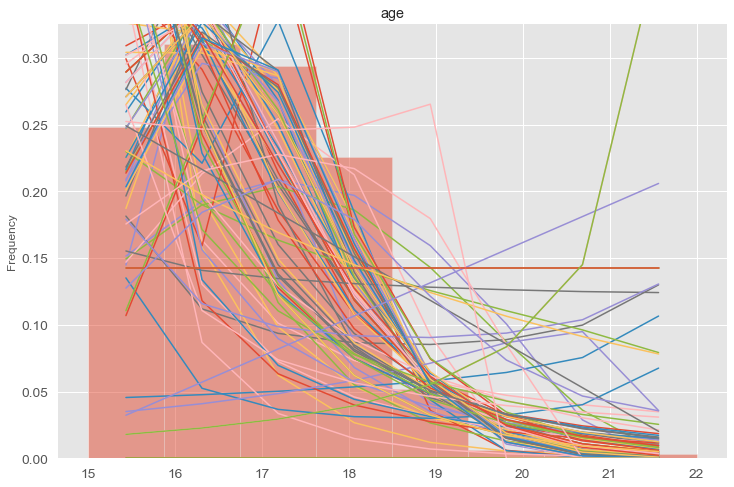

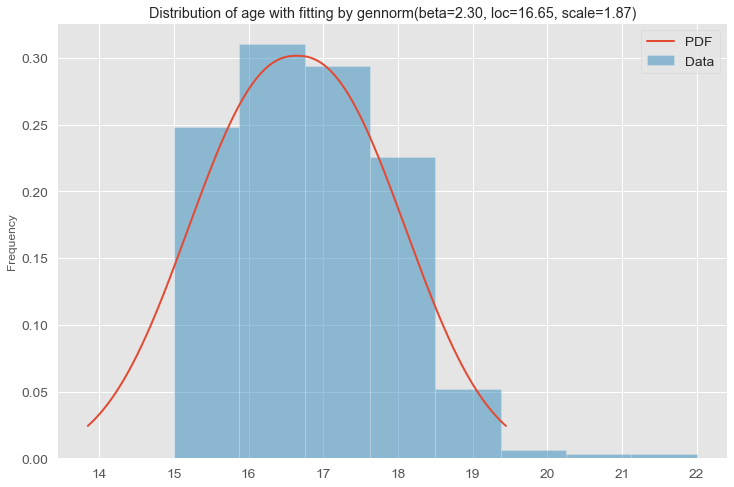

In [64]:
best_fit_name, best_fit_params, best_sse = plot_fit_pdf(data, n_bins=stud_math_stat['age'].nunique())
# plot_fit_pdf(data, n_bins=100)

print("\n")
print("The best fitting distribution is '{}'\n    with parameters: {}\n    and SSR={}."
      .format(best_fit_name, best_fit_params, best_sse))
# SSR (sum of squared residuals)

[15. 16. 17. 18. 19. 20. 21. 22.]
x_min=15.5; x_max=21.5, N_x=7
Distribution fitting: |                                        | 0.0% 0.071 sec. SSE = 0.022487 for 'alpha'.
Distribution fitting: |                                        | 1.0% 0.113 sec. SSE = 0.019512 for 'anglit'.
Distribution fitting: |                                        | 2.1% 0.183 sec. SSE = 0.019512 for 'arcsine'.
Distribution fitting: |#                                       | 3.1% 0.364 sec. SSE = 0.019512 for 'beta'.
Distribution fitting: |#                                       | 4.1% 0.544 sec. SSE = 0.012362 for 'betaprime'.
Distribution fitting: |##                                      | 5.2% 0.713 sec. SSE = 0.012362 for 'bradford'.
Distribution fitting: |##                                      | 6.2% 1.068 sec. SSE = 0.012362 for 'burr'.
Distribution fitting: |##                                      | 7.2% 1.199 sec. SSE = 0.012362 for 'burr12'.
Distribution fitting: |###                             

C:\Users\DNS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


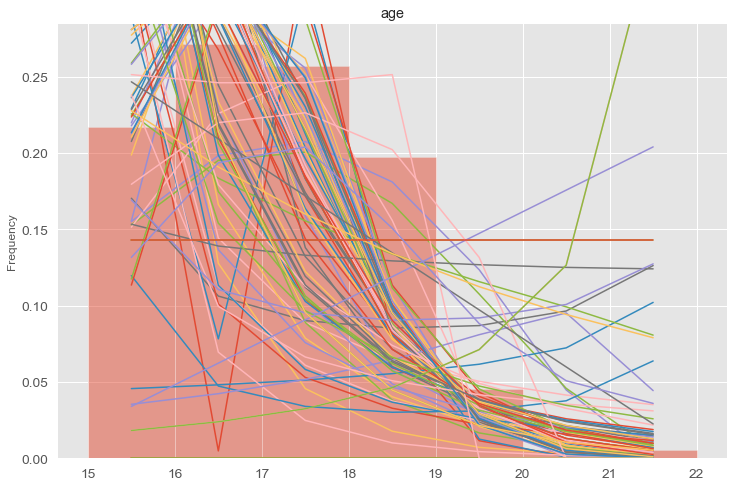

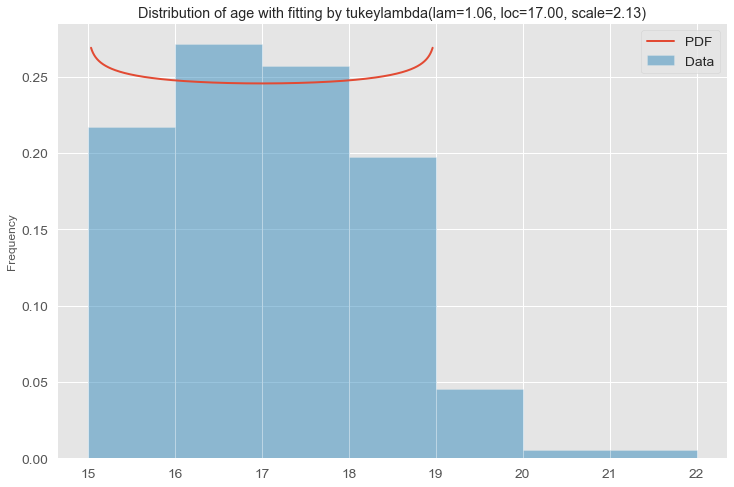

In [65]:
best_fit_name, best_fit_params, best_sse = plot_fit_pdf(data, n_bins=stud_math_stat['age'].nunique()-1)
# plot_fit_pdf(data, n_bins=100)

print("\n")
print("The best fitting distribution is '{}'\n    with parameters: {}\n    and SSR={}."
      .format(best_fit_name, best_fit_params, best_sse))
# SSR (sum of squared residuals)

[15.         15.77777778 16.55555556 17.33333333 18.11111111 18.88888889
 19.66666667 20.44444444 21.22222222 22.        ]
x_min=15.38888888888889; x_max=21.61111111111111, N_x=9
Distribution fitting: |                                        | 0.0% 0.075 sec. SSE = 0.017443 for 'alpha'.
Distribution fitting: |                                        | 1.0% 0.096 sec. SSE = 0.017443 for 'anglit'.
Distribution fitting: |                                        | 2.1% 0.140 sec. SSE = 0.017443 for 'arcsine'.
Distribution fitting: |#                                       | 3.1% 0.283 sec. SSE = 0.017443 for 'beta'.
Distribution fitting: |#                                       | 4.1% 0.384 sec. SSE = 0.017443 for 'betaprime'.
Distribution fitting: |##                                      | 5.2% 0.444 sec. SSE = 0.017443 for 'bradford'.
Distribution fitting: |##                                      | 6.2% 0.754 sec. SSE = 0.017443 for 'burr'.
Distribution fitting: |##                         

C:\Users\DNS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)




The best fitting distribution is 'dgamma'
    with parameters: (2.8258222963648105, 16.523646338400056, 0.3708740848101994)
    and SSR=0.013251277383059581.


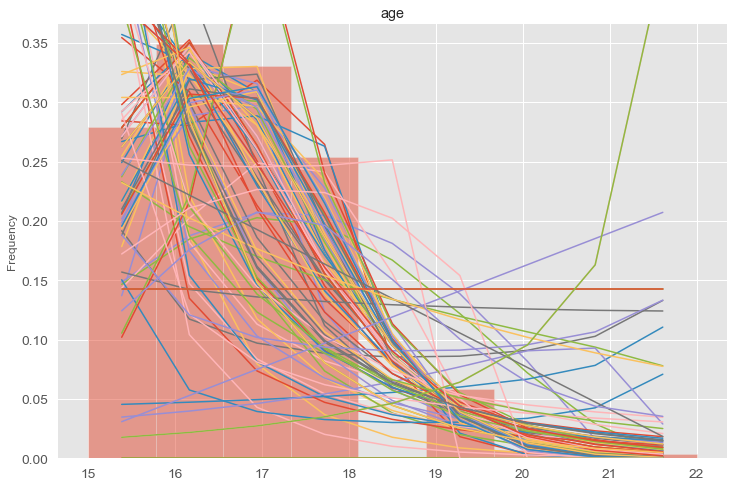

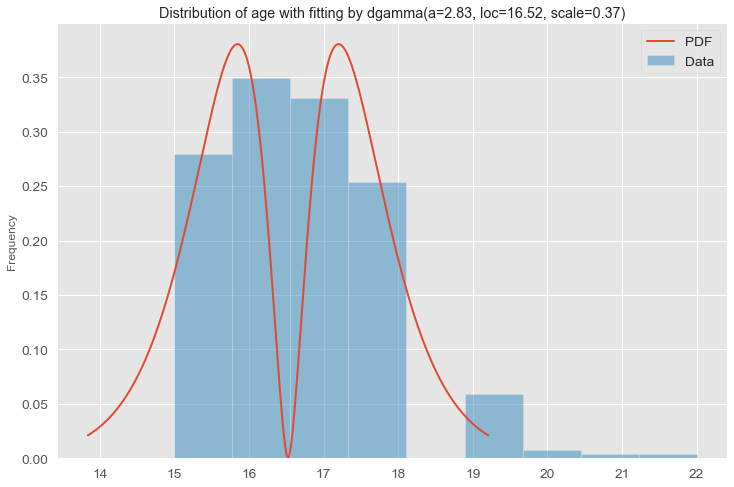

In [66]:
best_fit_name, best_fit_params, best_sse = plot_fit_pdf(data, n_bins=stud_math_stat['age'].nunique()+1)
# plot_fit_pdf(data, n_bins=100)

print("\n")
print("The best fitting distribution is '{}'\n    with parameters: {}\n    and SSR={}."
      .format(best_fit_name, best_fit_params, best_sse))
# SSR (sum of squared residuals)

In [67]:
# df = stud_math_stat
# n_bins_max = 20

# for item in features_numerical:
#     data = df[item]
#     if data.nunique() > n_bins_max:
#         n_bins = n_bins_max
#     else:
#         n_bins = data.nunique()
#     print("There are {} bins for {}.".format(n_bins, item))
#     print(data.value_counts())
#     plot_fit_pdf(data, n_bins=n_bins-1)

The feature 'absences' has 34 unique values and they are:


0.0     74
2.0     60
4.0     52
6.0     30
8.0     20
10.0    17
14.0    12
12.0    12
3.0      7
16.0     7
7.0      6
5.0      5
18.0     5
20.0     4
1.0      3
22.0     3
9.0      3
15.0     2
13.0     2
11.0     2
54.0     1
25.0     1
17.0     1
26.0     1
56.0     1
23.0     1
28.0     1
21.0     1
75.0     1
30.0     1
19.0     1
38.0     1
40.0     1
24.0     1
Name: absences, dtype: int64

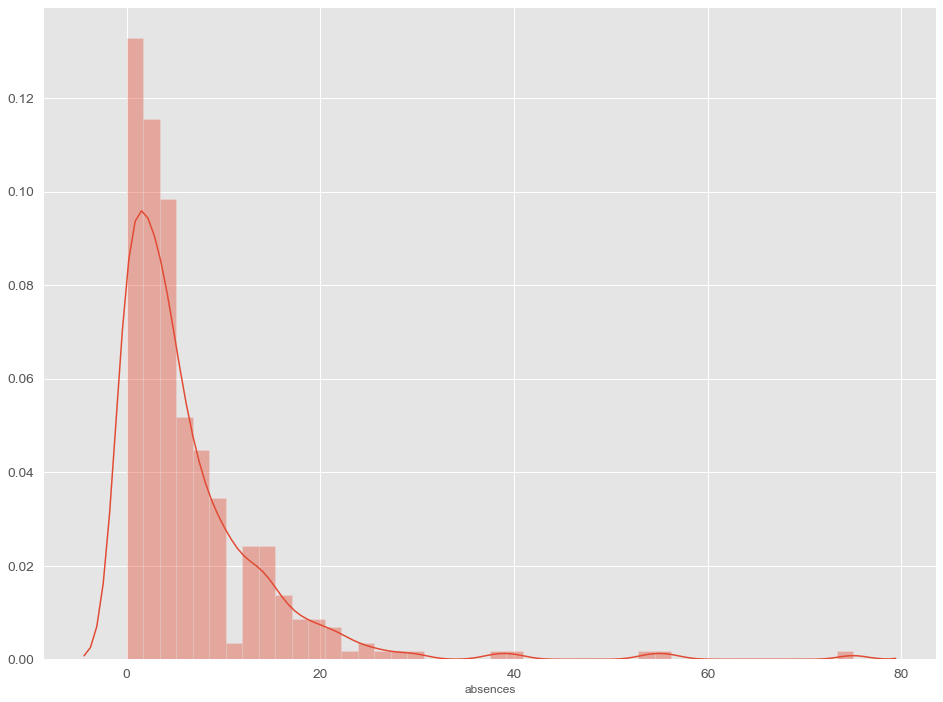

In [68]:
item = 'absences'
data = stud_math_stat[item]
sns.distplot(data)
print("The feature '{}' has {} unique values and they are:".format(item, stud_math_stat[item].nunique()))
stud_math_present[item].value_counts()

Вообще говоря, в нашем конкретном случае, переменные , которые для модели считаются "численными", с точки зрения теории вероятности являются дискретными, и потому могут быть "фитированы" с помощью моделирования вероятности дискретной случайной величины (*cumulative distribution function (CDF)*).

### 5.2.2. Моделирование вероятности дискретных величин

Будем моделировать вероятность дискретной переменной следующим образом:
1. С помощью `value_counts()` расположим значения пременной по убыванию частности их появления (хотя конкрентый порядок не важен).
2. Частность появления определённого значения примем за вероятность.
3. Поделим отрезок $[0, 1)$ отрезки с длинами равными вероятностям и соотнесём эти отрезки с соответствующими значениями.
4. Генерируя случайное число равномерным распределением `np.randon.rand()`, будем проверять какому отрезку оно принадлежит и считать, что в ходе моделирования полявилось соответствующее значение признака.

In [69]:
df = stud_math_stat
item = features_categorical[0]
data = df[item]
data.value_counts()

T    276
A     33
Name: Pstatus, dtype: int64

In [70]:
# import numpy as np

def prob_ranges(data):
    x = data.value_counts().index
    y = data.value_counts().values
    borders = np.insert(y.cumsum()/y.sum(), 0, 0)
#     borders = [0] + y.cumsum()/y.sum()

    return (x, borders)


def discrete_feature_impute(data):
    values, borders = prob_ranges(data)
    empty_index = data[data.isna() == True].index
#     print("values:", values)
#     print("borders:", borders, "\n")
#     print("empty_index:", empty_index, len(empty_index))
    
    y_model = np.random.rand(len(empty_index))
#     print("y_model:", y_model, len(y_model), "\n")
    
    impute_values = []
    j=0
    for y in y_model:
        j += 1
#         print("\ny =", y, j)
        for k in range(1, len(borders)):
#             print("k, (borders):", k-1, (borders[k-1], borders[k]))
            if borders[k-1] <= y <= borders[k]:
#                 print("! k, (borders):", k-1, (borders[k-1], borders[k]))
                imputer = values[k-1]
                impute_values.append(imputer)
#                 print("    ! bingo ! :", len(impute_values))
#                 print("imputer:", imputer, "\n")
                
#     print("impute_values:", impute_values, len(impute_values))
#     print(type(data))
    
#     print(data[100:105])
    
    new_data = data.copy()
#     print("len(empty_index)", len(empty_index))
    for k, ind in enumerate(empty_index):
#         print(k, ind, impute_values[k])
        new_data[ind] = impute_values[k]
        
#     print("\n")
    
        
    return new_data

In [71]:
print("before:", data.isna().sum())
new_data = discrete_feature_impute(data)
print("after:", new_data.isna().sum())
print(type(new_data))
new_data

before: 41
after: 0
<class 'pandas.core.series.Series'>


0      A
1      T
2      T
3      T
4      T
      ..
388    T
391    T
392    T
393    T
394    T
Name: Pstatus, Length: 350, dtype: object

In [72]:
compare_data = pd.DataFrame([data, new_data]).T
compare_data.columns=['before', 'after']
compare_data

,before,after
0,A,A
1,NaN,T
2,T,T
3,T,T
4,T,T
...,...,...
388,T,T
391,T,T
392,T,T
393,T,T


In [76]:
df = stud_math_stat

stud_math_prob = pd.DataFrame()

for item in df.columns:
    stud_math_prob[item] = discrete_feature_impute(stud_math_pres_stat[item])

stud_math_prob.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

В дальнейшем будем работать с `stud_math_prob` (350 записей, 28 признаков).

## 5.3 Дисбаланс классов

Окончательно проверим дисбаланс классов для датасета с вероятностной заменой:

In [78]:
def class_imbalance_detect(df, item, class_balance_threshold=3):
    bar_data_sorted = df.groupby(item)[item].count().sort_values()
    class_balance_ratio = round(np.exp(np.log(bar_data_sorted).diff()), 2)
    print(class_balance_ratio)    
    if class_balance_ratio.max() > class_balance_threshold:
        print("It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is", 
              class_balance_ratio.max(), "\n")
        return item
    else:
        print("Maximal Class balance ratio (to previous) is ", class_balance_ratio.max(), "\n")

In [79]:
imbalanced_features_prob = []
for item in features_one_hot_stat:
    if class_imbalance_detect(stud_math_prob, item) != None:
        imbalanced_features_prob.append(class_imbalance_detect(stud_math_prob, item))

Pstatus
A     NaN
T    8.72
Name: Pstatus, dtype: float64
It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 8.72 

Pstatus
A     NaN
T    8.72
Name: Pstatus, dtype: float64
It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 8.72 

Fjob
at_home      NaN
health      1.07
teacher     1.81
services    3.28
other       2.05
Name: Fjob, dtype: float64
It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 3.28 

Fjob
at_home      NaN
health      1.07
teacher     1.81
services    3.28
other       2.05
Name: Fjob, dtype: float64
It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 3.28 

internet
no      NaN
yes    5.86
Name: internet, dtype: float64
It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 5.86 

internet
no      NaN
yes    5.86
Name: internet, dtype: float64
It seems to be a severe CLASS IMBALANCE: Maximal Class ba

В дальнейшем надо учесть дисбаланс классов в признаках, указанных в списке `imbalanced_features_prob`:

In [80]:
imbalanced_features_prob

['Pstatus',
 'Fjob',
 'internet',
 'schoolsup',
 'nursery',
 'guardian',
 'school',
 'higher',
 'failures',
 'address']

А здесь список признаков, где дисбаланса классов нет:

In [83]:
set(features_one_hot_stat) - set(imbalanced_features_prob)

{'Mjob', 'activities', 'famsize', 'famsup', 'reason', 'romantic', 'sex'}

# 6. Преобразование данных

## 6.0 Преобразование типа данных

In [95]:
for item in stud_math_prob[features_numerical]:
    print(item, "\n", stud_math_prob[item].value_counts().index)
    
for item in stud_math[features_ordinal]:
    print(item, "\n", stud_math_prob[item].value_counts().index)

age 
 Int64Index([16, 17, 15, 18, 19, 20, 22, 21], dtype='int64')
absences 
 Float64Index([ 0.0,  2.0,  4.0,  6.0,  8.0, 10.0, 12.0, 14.0, 16.0,  3.0,  7.0,
              18.0,  5.0, 20.0, 22.0, 11.0,  1.0,  9.0, 13.0, 15.0, 56.0, 40.0,
              38.0, 19.0, 30.0, 75.0, 21.0, 23.0, 25.0, 54.0, 28.0, 26.0, 24.0,
              17.0],
             dtype='float64')
studytime 
 Float64Index([2.0, 1.0, 3.0, 4.0], dtype='float64')
Medu 
 Float64Index([4.0, 3.0, 2.0, 1.0, 0.0], dtype='float64')
traveltime 
 Float64Index([1.0, 2.0, 3.0, 4.0], dtype='float64')
goout 
 Float64Index([3.0, 2.0, 4.0, 5.0, 1.0], dtype='float64')
famrel 
 Float64Index([4.0, 5.0, 3.0, 2.0, 1.0], dtype='float64')
freetime 
 Float64Index([3.0, 4.0, 2.0, 5.0, 1.0], dtype='float64')
health 
 Float64Index([5.0, 3.0, 4.0, 1.0, 2.0], dtype='float64')
Fedu 
 Float64Index([2.0, 3.0, 4.0, 1.0, 0.0], dtype='float64')


Заменим тип численным и порядковым переменным на `int`.

In [105]:
for item in stud_math[features_numerical]:
    stud_math_prob[item] = stud_math_prob[item].astype('int')
    
for item in stud_math[features_ordinal]:
    stud_math_prob[item] = stud_math_prob[item].astype('int')
    
stud_math_prob['score'] = stud_math_prob['score'].astype('int')

## 6.1 Преобразование *One-Hot* переменных

One-Hot переменные преобразуем в *dummy*-переменные, откинув одиу *dummy*-переменную во избежании *dummy*-ловушки.

In [106]:
stud_math_prob_dummies = pd.get_dummies(stud_math_prob, columns=features_one_hot_stat, drop_first=True)
stud_math_prob_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score', 'Pstatus_T', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'internet_yes',
       'schoolsup_yes', 'nursery_yes', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'guardian_mother', 'guardian_other',
       'school_MS', 'higher_yes', 'sex_M', 'famsize_LE3', 'failures_1.0',
       'failures_2.0', 'failures_3.0', 'reason_home', 'reason_other',
       'reason_reputation', 'romantic_yes', 'address_U', 'famsup_yes',
       'activities_yes'],
      dtype='object')

In [107]:
stud_math_prob_dummies.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                350 non-null    int32
 1   Medu               350 non-null    int32
 2   Fedu               350 non-null    int32
 3   traveltime         350 non-null    int32
 4   studytime          350 non-null    int32
 5   famrel             350 non-null    int32
 6   freetime           350 non-null    int32
 7   goout              350 non-null    int32
 8   health             350 non-null    int32
 9   absences           350 non-null    int32
 10  score              350 non-null    int32
 11  Pstatus_T          350 non-null    uint8
 12  Fjob_health        350 non-null    uint8
 13  Fjob_other         350 non-null    uint8
 14  Fjob_services      350 non-null    uint8
 15  Fjob_teacher       350 non-null    uint8
 16  internet_yes       350 non-null    uint8
 17  schoolsup_yes   

## 6.2 Преобразование *Ordinal* переменных (не требуется)

In [101]:
# stud_math_prob[features_ordinal]
stud_math_prob_dummies[features_ordinal]

,studytime,Medu,traveltime,goout,famrel,freetime,health,Fedu
0,2,4,2,4,4,3,3,4
1,2,1,1,3,5,3,3,1
2,2,1,1,2,4,3,3,1
3,3,4,1,2,3,2,5,2
4,2,3,1,2,4,3,5,3
...,...,...,...,...,...,...,...,...
388,2,3,1,4,4,3,1,1
391,1,3,2,5,2,4,2,1
392,1,1,1,3,5,5,3,1
393,1,3,3,1,4,4,5,2


# 99 Выводы

В предоставленной таблице содержалось 395 записей  с 30 признаками. Многие признаки содержали пропуски. В предоставленной таблице присутствовал столбец `studytime, granular`, отсутствующий в описании. 

**Дубликатов нет**. 

**Целевой признак** - `score`.

**Удалены записи**:
- С пропусками в целевом признаке (`score`) (6 штук) — нам нужна достоверная информация о целевом признаке.
- С аномальными значениями (=0) в целевом признаке (37 штук) — это информация о несдавших экзамен. Сдал/не сдал экзамен — это задача классификации, а не предсказания оценки.
- С аномально большими значениями прогулов (`absences`) (2 штуки) — явный выброс на распределении.

Проведено 2 **замены аномалий**:
1. `Fedu` (образование отца).  Выброс с абсурдным значением `40` заменён на `4` (возможные значения признака - [1, 2, 3, 4, 5]). Вероятнее всего, это опечатка.
2. `famrel` (семейные отношения) Запись с абсурдным значением `-1` заменена на `1` (возможные значения признака - [1, 2, 3, 4, 5]). Вероятно, это - опечатка.

**Удалены признаки**:
- `paid` - категориальный, статистический анализ показал, что его классы имеют одинаковое распределение.
- `studytime, granular`, поскольку абсолютно коррелировал с `studytime` (коэффиуиент корреляции = 1).

Оставшиеся **пропуски заменены** по моделированию распределений соответствующих признаков

*One-Hot* признаки проверены на дисбаланс классов. **Список подозреваемх на дисбаланс классов признаков** находится в списке `imbalanced_features_prob`

**Заменён тип** численным и порядковым переменным на `int`.

***One-Hot* переменные преобразованы в *dummy*-переменные** (откинув одиу *dummy*-переменную во избежании *dummy*-ловушки).

**Данные подготовленные для создания модели содержатся в таблице `stud_math_prob_dummies`.**

## 99.1 Примечания:


Признак `failures` определён как количество внеучебных неудач (n, если 1<=n<3, иначе 0). Если неудач было 0, или больше 3, признак в обоих случая будет 0. Это не `ordinal`, a `one-hot` признак.

**Важно!** Оценки кратны 5, это необходимо учесть при прогнозировании и валидации. В частности результаты прогноза модели можно округлять по модулю 5.

**Note**: Предсказание "придёт/не придёт человек на экзамен" это задача классификации, а не регрессии и требует несколько иного подхода и иной модели.

<div style="border:solid blue 2px; padding: 20px"> <h3 style="color:blue; margin-bottom:20px">List of DataFrames</h3>
    
| DataFrames | Description | Comments |
| :-- | :-- | :-- |
| *stud_math* | *Initial data*: 30 features x 395 entries. <br/> *Drop target missing values*: 30 features x 389 entries |  |
| *stud_math_absent* | *Only target anomalies(=0)*: 30 features x 37 entries | Who missed  exam |
| **stud_math_present** | *Drop* 37 *target* anomalies (=0): 30 features x 352 entries <br/> *Drop* 2 *absences* anomalies (>100): 30 features x 350 entries | Who was present at exam |
| *stud_math_pres_simplest* | *Drop features* with indistinguishable classes: 23 features x 350 entries | According to the *useless_variables_simplest* list |    
| **stud_math_pres_stat** | *Drop feature* with indistinguishable classes (*paid*): 29 features x 350 entries <br/> *Drop 'studytime, granular* which is absolutely correlated with *'studytime*: 28 features x 350 entries | According to the *useless_variables_stat* list |
| *stud_math_const* | Missing values are imputed with constants: 28 features x 350 entries | From *stud_math_pres_stat* |
| **stud_math_prob** | Missing values are imputed via probability distribution: 28 features x 350 entries | From *stud_math_pres_stat* |
| **stud_math_prob_dummies** | *One-Hot* features are substituted with *dummy*-variables | *Dummy*-trap is avoided |


<h3 style="color:blue; margin-bottom:20px">List of Lists</h3>

| List | Description | Comments |
| :-- | :-- | :-- |
| features_numerical | Numerical features |  |
| features_categorical | Categorical features | *features_ordinal* $\cup$ *features_one_hot* |
| features_ordinal | Ordinal features | Subset of *features_categorical* |
| features_one_hot | One Hot features | Subset of *features_categorical* |
| features_one_hot_stat | One Hot features | *features_one_hot* without *useless_variables_stat* |
| imbalance_features | One-Hot features suspected in class imbalance | Class imbalance threshold is included as last element (dict) |
| useless_variables_simplest | One-Hot features with indistinguishable classes | To drop from dataset according to the *simplest* method of class distribution comparison |
| features_one_hot_simplest | One-Hot features with distinguishable classes | According to the *simplest* method of class distribution comparison |
| useless_variables_stat | One-Hot features with indistinguishable classes | To drop from dataset according to the *statistical* method of class distribution comparison |

**What can be done more (in future)**:

- Можно отдельно предсказать придёт/не придёт человек на экзамен.